import and inline matplotlib

In [1]:
import ROOT as rt
from root_numpy import root2array, tree2array
#from root_pandas import read_root
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

import gpustat
gpustat.print_gpustat()
os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/02
imperium-sm.hep.caltech.edu  Sun Jun 27 21:48:55 2021  450.36.06
[0] GeForce GTX 1080 | 24'C,   0 % |     1 /  8119 MB |
[1] GeForce GTX 1080 | 27'C,   0 % |     1 /  8119 MB |
[2] GeForce GTX 1080 | 28'C,   0 % |     1 /  8119 MB |
[3] GeForce GTX 1080 | 24'C,   0 % |     1 /  8119 MB |
[4] GeForce GTX 1080 | 28'C,   0 % |     1 /  8119 MB |
[5] GeForce GTX 1080 | 27'C,   0 % |     1 /  8119 MB |
[6] GeForce GTX 1080 | 28'C,   0 % |     1 /  8119 MB |
[7] GeForce GTX 1080 | 28'C,   0 % |     1 /  8119 MB |


make a random variable

In [2]:
FILE_ggHH_SM = '../HHbbggAna/out.root'

make a one-D histogram

In [3]:
test_name = '0519v1'

rt.gROOT.SetBatch()
rt.gROOT.Reset()

#ggHH SM signal
ggHH1_signalFile = rt.TFile(FILE_ggHH_SM)
ggHH1_signalTree = ggHH1_signalFile.Get('tree')
sumW = ggHH1_signalFile.Get('h_sumOfgenWeight').GetBinContent(1)

##Define variables 
HH_variables = ['genHH_pt','genHH_mass','genHH_eta','genHH_phi',
             'genLeadingH_pt','genLeadingH_mass','genLeadingH_eta','genLeadingH_phi',
             'gensubLeadingH_pt','gensubLeadingH_mass','gensubLeadingH_eta','gensubLeadingH_phi']
photon_variables = ['genLeadingPho_pt', 'genLeadingPho_mass', 'genLeadingPho_eta', 'genLeadingPho_phi', 
                    'gensubLeadingPho_pt', 'gensubLeadingPho_mass', 'gensubLeadingPho_eta', 'gensubLeadingPho_phi',
                   'genPho_deltaR', 'genPho_H_pt']

bb_variables = ['genLeadingBjet_pt', 'genLeadingBjet_mass', 'genLeadingBjet_eta', 'genLeadingBjet_phi', 
                    'gensubLeadingBjet_pt', 'gensubLeadingBjet_mass', 'gensubLeadingBjet_eta', 
                'gensubLeadingBjet_phi', 'genBjet_deltaR', 'genBjet_H_pt']

gen_variables = ['gensubLeadingGenjet_mass', 'genLeadingGenjet_mass']
weights = ['genweight']

xsHH = 31.05 #fb
BRHbb = 5.824E-01
BRHgg = 2.270E-03

lumi = 300 #/fb

xsHHbbgg = xsHH*BRHbb*BRHgg*2.

ggHH1_signp = tree2array(ggHH1_signalTree,branches = HH_variables + photon_variables + bb_variables +  gen_variables+ weights)

df_signal_ggHH = pd.DataFrame.from_records(ggHH1_signp)

In [4]:
print(np.sum(df_signal_ggHH['genweight'])/sumW)

24.62616615029734


In [13]:
# Variables
HH_variables = ['genHH_pt','genHH_mass','genHH_eta','genHH_phi',
             'genLeadingH_pt','genLeadingH_mass','genLeadingH_eta','genLeadingH_phi',
             'gensubLeadingH_pt','gensubLeadingH_mass','gensubLeadingH_eta','gensubLeadingH_phi']

photon_variables = ['genLeadingPho_pt', 'genLeadingPho_mass', 'genLeadingPho_eta', 'genLeadingPho_phi', 
                    'gensubLeadingPho_pt', 'gensubLeadingPho_mass', 'gensubLeadingPho_eta', 'gensubLeadingPho_phi']

pho_recon_variables = ['leading_photon_pt', 'leading_photon_eta', 'leading_photon_phi', 
                      'subleading_photon_pt', 'subleading_photon_eta', 'subleading_photon_phi', 
                      'diphoton_pt', 'diphoton_eta', 'diphoton_mass']

bb_variables = ['genLeadingBjet_pt', 'genLeadingBjet_mass', 'genLeadingBjet_eta', 'genLeadingBjet_phi', 
                    'gensubLeadingBjet_pt', 'gensubLeadingBjet_mass', 'gensubLeadingBjet_eta', 
                'gensubLeadingBjet_phi']

bb_recon_variables = ['leading_bjet_pt', 'leading_bjet_eta', 'leading_bjet_phi', 
                      'subleading_bjet_pt', 'subleading_bjet_eta', 'subleading_bjet_phi', 
                      'dibjet_pt', 'dibjet_eta', 'dibjet_mass']
weights = ['genweight']


# Make trees/dataframes
GluGluToHH_file = rt.TFile('../HHbbggAna/condor/output/job_1_ntuple0625v1/GluGluToHHTo2B2G_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8.root')
GluGluToHH_tree = GluGluToHH_file.Get('tree')
GluGluToHH_p = tree2array(GluGluToHH_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
GluGluToHH_df = pd.DataFrame.from_records(GluGluToHH_p)
GluGluToHH_sumW = GluGluToHH_file.Get('h_sumOfgenWeight').GetBinContent(1)

VHToGG_file = rt.TFile('../HHbbggAna/condor/output/job_2_ntuple0625v1/VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root')
VHToGG_tree = VHToGG_file.Get('tree')
VHToGG_p = tree2array(VHToGG_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
VHToGG_df = pd.DataFrame.from_records(VHToGG_p)
VHToGG_sumW = VHToGG_file.Get('h_sumOfgenWeight').GetBinContent(1)

ttHToGG_file = rt.TFile('../HHbbggAna/condor/output/job_3_ntuple0625v1/ttHToGG_M125_TuneCP5_PSweights_13TeV-powheg-pythia8.root')
ttHToGG_tree = ttHToGG_file.Get('tree')
ttHToGG_p = tree2array(ttHToGG_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
ttHToGG_df = pd.DataFrame.from_records(ttHToGG_p)
ttHToGG_sumW = ttHToGG_file.Get('h_sumOfgenWeight').GetBinContent(1)

VBRHToGG_file = rt.TFile('../HHbbggAna/condor/output/job_4_ntuple0625v1/VBFHToGG_M125_13TeV_amcatnlo_pythia8.root')
VBRHToGG_tree = VBRHToGG_file.Get('tree')
VBRHToGG_p = tree2array(VBRHToGG_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
VBRHToGG_df = pd.DataFrame.from_records(VBRHToGG_p)
VBRHToGG_sumW = VBRHToGG_file.Get('h_sumOfgenWeight').GetBinContent(1)

GluGluHToGG_file = rt.TFile('../HHbbggAna/condor/output/job_5_ntuple0625v1/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8.root')
GluGluHToGG_tree = GluGluHToGG_file.Get('tree')
GluGluHToGG_p = tree2array(GluGluHToGG_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
GluGluHToGG_df = pd.DataFrame.from_records(GluGluHToGG_p)
GluGluHToGG_sumW = GluGluHToGG_file.Get('h_sumOfgenWeight').GetBinContent(1)

GJet_SmallPt_file = rt.TFile('../HHbbggAna/condor/output/job_6_ntuple0625v1/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8.root')
GJet_SmallPt_tree = GJet_SmallPt_file.Get('tree')
GJet_SmallPt_p = tree2array(ttHToGG_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
GJet_SmallPt_df = pd.DataFrame.from_records(GJet_SmallPt_p)
GJet_SmallPt_sumW = GJet_SmallPt_file.Get('h_sumOfgenWeight').GetBinContent(1)

GJet_BigPt_file = rt.TFile('../HHbbggAna/condor/output/job_7_ntuple0625v1/GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCP5_13TeV_Pythia8.root')
GJet_BigPt_tree = GJet_BigPt_file.Get('tree')
GJet_BigPt_p = tree2array(GJet_BigPt_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
GJet_BigPt_df = pd.DataFrame.from_records(ttHToGG_p)
GJet_BigPt_sumW = GJet_BigPt_file.Get('h_sumOfgenWeight').GetBinContent(1)

DiPhotonJetsBox2B_file = rt.TFile('../HHbbggAna/condor/output/job_8_ntuple0625v1/DiPhotonJetsBox2BJets_MGG-80toInf_13TeV-Sherpa.root')
DiPhotonJetsBox2B_tree = DiPhotonJetsBox2B_file.Get('tree')
DiPhotonJetsBox2B_p = tree2array(DiPhotonJetsBox2B_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
DiPhotonJetsBox2B_df = pd.DataFrame.from_records(DiPhotonJetsBox2B_p)
DiPhotonJetsBox2B_sumW = DiPhotonJetsBox2B_file.Get('h_sumOfgenWeight').GetBinContent(1)

DiPhotonJetsBox1B_file = rt.TFile('../HHbbggAna/condor/output/job_9_ntuple0625v1/DiPhotonJetsBox1BJet_MGG-80toInf_13TeV-Sherpa.root')
DiPhotonJetsBox1B_tree = DiPhotonJetsBox1B_file.Get('tree')
DiPhotonJetsBox1B_p = tree2array(DiPhotonJetsBox1B_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
DiPhotonJetsBox1B_df = pd.DataFrame.from_records(DiPhotonJetsBox1B_p)
DiPhotonJetsBox1B_sumW = DiPhotonJetsBox1B_file.Get('h_sumOfgenWeight').GetBinContent(1)

DiPhotonJetsBox_file = rt.TFile('../HHbbggAna/condor/output/job_10_ntuple0625v1/DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root')
DiPhotonJetsBox_tree = DiPhotonJetsBox_file.Get('tree')
DiPhotonJetsBox_p = tree2array(DiPhotonJetsBox_tree, branches = HH_variables + photon_variables + pho_recon_variables + bb_variables + bb_recon_variables +  weights)
DiPhotonJetsBox_df = pd.DataFrame.from_records(DiPhotonJetsBox_p)
DiPhotonJetsBox_sumW = DiPhotonJetsBox_file.Get('h_sumOfgenWeight').GetBinContent(1)

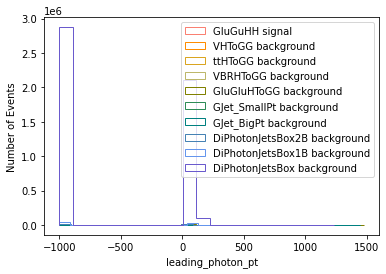

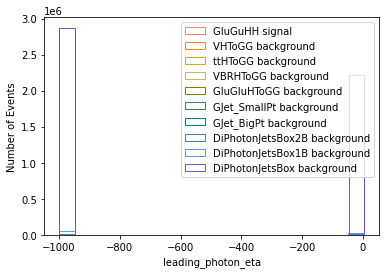

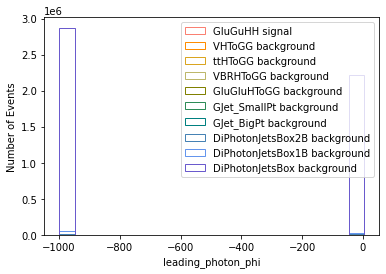

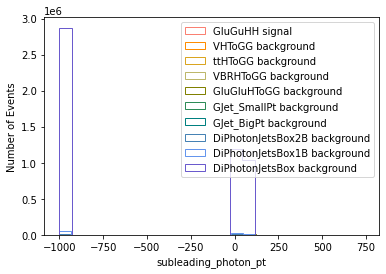

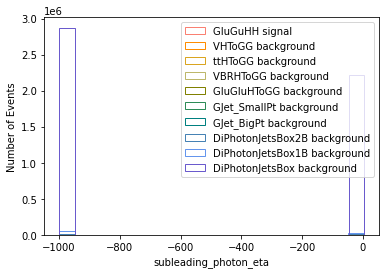

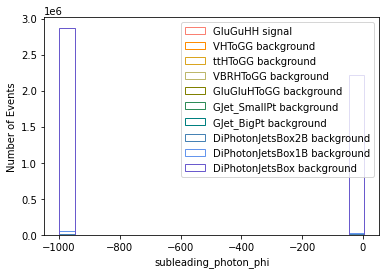

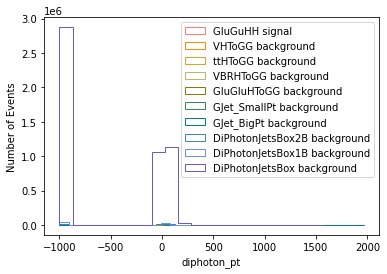

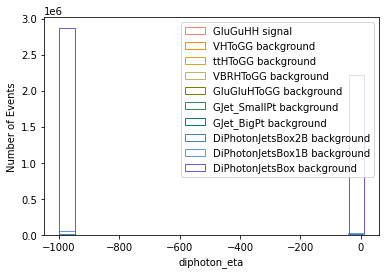

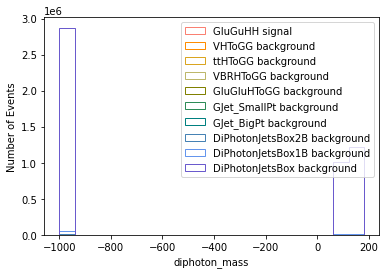

In [20]:
PLFs = ['leading_photon_pt', 'leading_photon_eta', 'leading_photon_phi', 
                      'subleading_photon_pt', 'subleading_photon_eta', 'subleading_photon_phi', 
                      'diphoton_pt', 'diphoton_eta', 'diphoton_mass']

for plf in PLFs:
    plt.figure()
    plt.hist(GluGluToHH_df[plf], color='salmon', weights=GluGluToHH_df['genweight'], bins=20, histtype='step', label='GluGuHH signal')
    plt.hist(VHToGG_df[plf], color='darkorange', weights=VHToGG_df['genweight'], bins=20, histtype='step', label='VHToGG background')
    plt.hist(ttHToGG_df[plf], color='goldenrod', weights=ttHToGG_df['genweight'], bins=20, histtype='step', label='ttHToGG background')
    plt.hist(VBRHToGG_df[plf], color='darkkhaki', weights=VBRHToGG_df['genweight'], bins=20, histtype='step', label='VBRHToGG background')
    plt.hist(GluGluHToGG_df[plf], color='olive', weights=GluGluHToGG_df['genweight'], bins=20, histtype='step', label='GluGluHToGG background')
    plt.hist(GJet_SmallPt_df[plf], color='seagreen', weights=GJet_SmallPt_df['genweight'], bins=20, histtype='step', label='GJet_SmallPt background')
    plt.hist(GJet_BigPt_df[plf], color='teal', weights=GJet_BigPt_df['genweight'], bins=20, histtype='step', label='GJet_BigPt background')
    plt.hist(DiPhotonJetsBox2B_df[plf], color='steelblue', weights=DiPhotonJetsBox2B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox2B background')
    plt.hist(DiPhotonJetsBox1B_df[plf], color='cornflowerblue', weights=DiPhotonJetsBox1B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox1B background')
    plt.hist(DiPhotonJetsBox_df[plf], color='slateblue', weights=DiPhotonJetsBox_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox background')
    plt.xlabel(plf)
    plt.ylabel("Number of Events")
    plt.legend(loc='best')

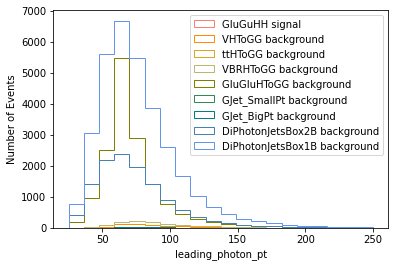

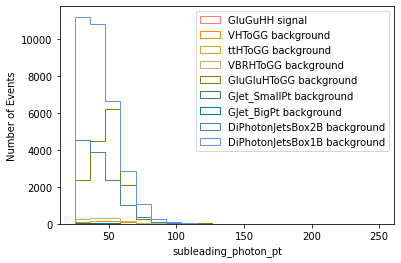

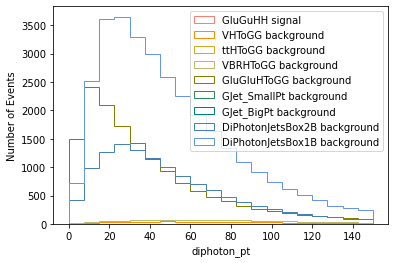

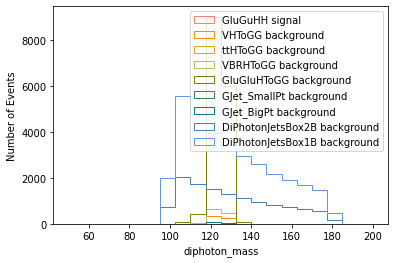

In [25]:


plt.figure()
plt.hist(GluGluToHH_df['leading_photon_pt'], color='salmon', weights=GluGluToHH_df['genweight'], bins=20, histtype='step', label='GluGuHH signal', range = (25, 250))
plt.hist(VHToGG_df['leading_photon_pt'], color='darkorange', weights=VHToGG_df['genweight'], bins=20, histtype='step', label='VHToGG background', range = (25, 250))
plt.hist(ttHToGG_df['leading_photon_pt'], color='goldenrod', weights=ttHToGG_df['genweight'], bins=20, histtype='step', label='ttHToGG background', range = (25, 250))
plt.hist(VBRHToGG_df['leading_photon_pt'], color='darkkhaki', weights=VBRHToGG_df['genweight'], bins=20, histtype='step', label='VBRHToGG background', range = (25, 250))
plt.hist(GluGluHToGG_df['leading_photon_pt'], color='olive', weights=GluGluHToGG_df['genweight'], bins=20, histtype='step', label='GluGluHToGG background', range = (25, 250))
plt.hist(GJet_SmallPt_df['leading_photon_pt'], color='seagreen', weights=GJet_SmallPt_df['genweight'], bins=20, histtype='step', label='GJet_SmallPt background', range = (25, 250))
plt.hist(GJet_BigPt_df['leading_photon_pt'], color='teal', weights=GJet_BigPt_df['genweight'], bins=20, histtype='step', label='GJet_BigPt background', range = (25, 250))
plt.hist(DiPhotonJetsBox2B_df['leading_photon_pt'], color='steelblue', weights=DiPhotonJetsBox2B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox2B background', range = (25, 250))
plt.hist(DiPhotonJetsBox1B_df['leading_photon_pt'], color='cornflowerblue', weights=DiPhotonJetsBox1B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox1B background' , range = (25, 250))
#plt.hist(DiPhotonJetsBox_df['leading_photon_pt'], color='slateblue', weights=DiPhotonJetsBox_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox background', range = (25, 250))
plt.xlabel('leading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

plt.figure()
plt.hist(GluGluToHH_df['subleading_photon_pt'], color='salmon', weights=GluGluToHH_df['genweight'], bins=20, histtype='step', label='GluGuHH signal', range = (25, 250))
plt.hist(VHToGG_df['subleading_photon_pt'], color='darkorange', weights=VHToGG_df['genweight'], bins=20, histtype='step', label='VHToGG background', range = (25, 250))
plt.hist(ttHToGG_df['subleading_photon_pt'], color='goldenrod', weights=ttHToGG_df['genweight'], bins=20, histtype='step', label='ttHToGG background', range = (25, 250))
plt.hist(VBRHToGG_df['subleading_photon_pt'], color='darkkhaki', weights=VBRHToGG_df['genweight'], bins=20, histtype='step', label='VBRHToGG background', range = (25, 250))
plt.hist(GluGluHToGG_df['subleading_photon_pt'], color='olive', weights=GluGluHToGG_df['genweight'], bins=20, histtype='step', label='GluGluHToGG background', range = (25, 250))
plt.hist(GJet_SmallPt_df['subleading_photon_pt'], color='seagreen', weights=GJet_SmallPt_df['genweight'], bins=20, histtype='step', label='GJet_SmallPt background', range = (25, 250))
plt.hist(GJet_BigPt_df['subleading_photon_pt'], color='teal', weights=GJet_BigPt_df['genweight'], bins=20, histtype='step', label='GJet_BigPt background', range = (25, 250))
plt.hist(DiPhotonJetsBox2B_df['subleading_photon_pt'], color='steelblue', weights=DiPhotonJetsBox2B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox2B background', range = (25, 250))
plt.hist(DiPhotonJetsBox1B_df['subleading_photon_pt'], color='cornflowerblue', weights=DiPhotonJetsBox1B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox1B background' , range = (25, 250))
#plt.hist(DiPhotonJetsBox_df['subleading_photon_pt'], color='slateblue', weights=DiPhotonJetsBox_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox background', range = (25, 250))
plt.xlabel('subleading_photon_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

plt.figure()
plt.hist(GluGluToHH_df['diphoton_pt'], color='salmon', weights=GluGluToHH_df['genweight'], bins=20, histtype='step', label='GluGuHH signal', range = (0, 150))
plt.hist(VHToGG_df['diphoton_pt'], color='darkorange', weights=VHToGG_df['genweight'], bins=20, histtype='step', label='VHToGG background', range = (0, 150))
plt.hist(ttHToGG_df['diphoton_pt'], color='goldenrod', weights=ttHToGG_df['genweight'], bins=20, histtype='step', label='ttHToGG background', range = (0, 150))
plt.hist(VBRHToGG_df['diphoton_pt'], color='darkkhaki', weights=VBRHToGG_df['genweight'], bins=20, histtype='step', label='VBRHToGG background', range = (0, 150))
plt.hist(GluGluHToGG_df['diphoton_pt'], color='olive', weights=GluGluHToGG_df['genweight'], bins=20, histtype='step', label='GluGluHToGG background', range = (0, 150))
plt.hist(GJet_SmallPt_df['diphoton_pt'], color='seagreen', weights=GJet_SmallPt_df['genweight'], bins=20, histtype='step', label='GJet_SmallPt background', range = (0, 150))
plt.hist(GJet_BigPt_df['diphoton_pt'], color='teal', weights=GJet_BigPt_df['genweight'], bins=20, histtype='step', label='GJet_BigPt background', range = (0, 150))
plt.hist(DiPhotonJetsBox2B_df['diphoton_pt'], color='steelblue', weights=DiPhotonJetsBox2B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox2B background', range = (0, 150))
plt.hist(DiPhotonJetsBox1B_df['diphoton_pt'], color='cornflowerblue', weights=DiPhotonJetsBox1B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox1B background' , range = (0, 150))
#plt.hist(DiPhotonJetsBox_df['diphoton_pt'], color='slateblue', weights=DiPhotonJetsBox_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox background', range = (0, 150))
plt.xlabel('diphoton_pt')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()

plt.figure()
plt.hist(GluGluToHH_df['diphoton_mass'], color='salmon', weights=GluGluToHH_df['genweight'], bins=20, histtype='step', label='GluGuHH signal', range = (50, 200))
plt.hist(VHToGG_df['diphoton_mass'], color='darkorange', weights=VHToGG_df['genweight'], bins=20, histtype='step', label='VHToGG background', range = (50, 200))
plt.hist(ttHToGG_df['diphoton_mass'], color='goldenrod', weights=ttHToGG_df['genweight'], bins=20, histtype='step', label='ttHToGG background', range = (50, 200))
plt.hist(VBRHToGG_df['diphoton_mass'], color='darkkhaki', weights=VBRHToGG_df['genweight'], bins=20, histtype='step', label='VBRHToGG background', range = (50, 200))
plt.hist(GluGluHToGG_df['diphoton_mass'], color='olive', weights=GluGluHToGG_df['genweight'], bins=20, histtype='step', label='GluGluHToGG background', range = (50, 200))
plt.hist(GJet_SmallPt_df['diphoton_mass'], color='seagreen', weights=GJet_SmallPt_df['genweight'], bins=20, histtype='step', label='GJet_SmallPt background', range = (50, 200))
plt.hist(GJet_BigPt_df['diphoton_mass'], color='teal', weights=GJet_BigPt_df['genweight'], bins=20, histtype='step', label='GJet_BigPt background', range = (50, 200))
plt.hist(DiPhotonJetsBox2B_df['diphoton_mass'], color='steelblue', weights=DiPhotonJetsBox2B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox2B background', range = (50, 200))
plt.hist(DiPhotonJetsBox1B_df['diphoton_mass'], color='cornflowerblue', weights=DiPhotonJetsBox1B_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox1B background' , range = (50, 200))
#plt.hist(DiPhotonJetsBox_df['diphoton_mass'], color='slateblue', weights=DiPhotonJetsBox_df['genweight'], bins=20, histtype='step', label='DiPhotonJetsBox background', range = (50, 200))
plt.xlabel('diphoton_mass')
plt.ylabel("Number of Events")
plt.legend(loc='best')
plt.show()


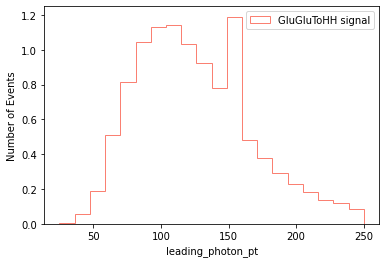

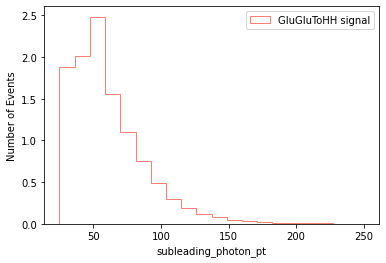

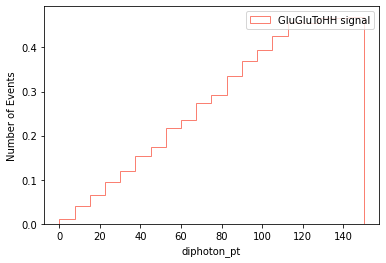

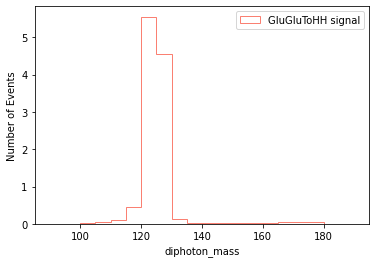

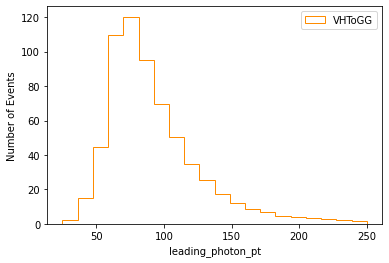

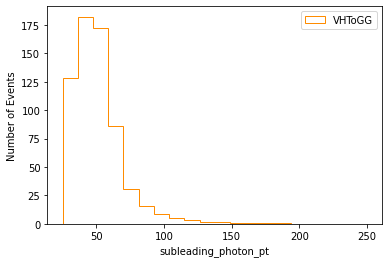

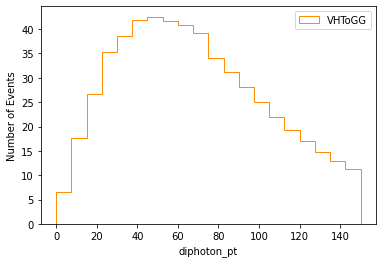

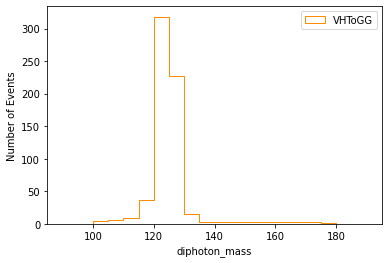

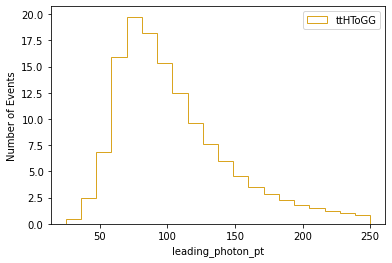

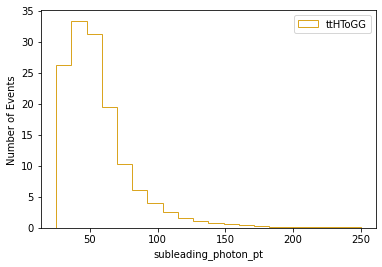

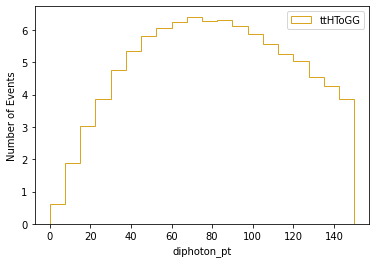

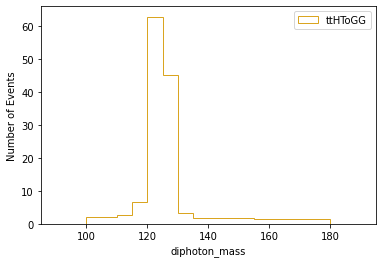

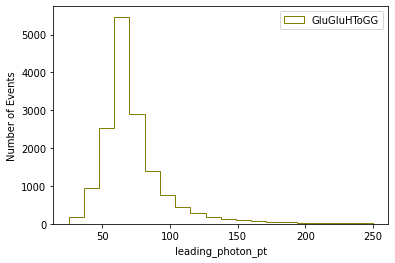

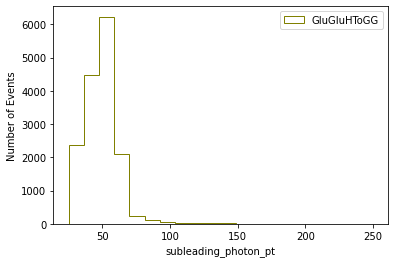

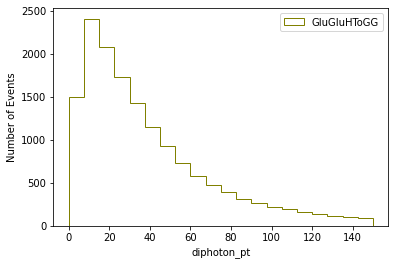

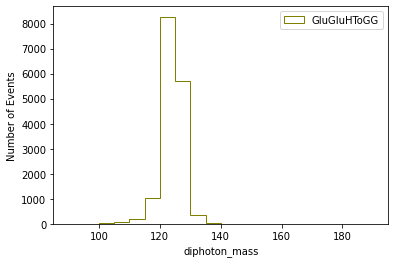

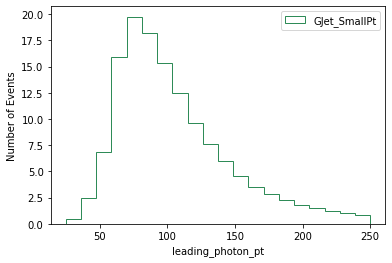

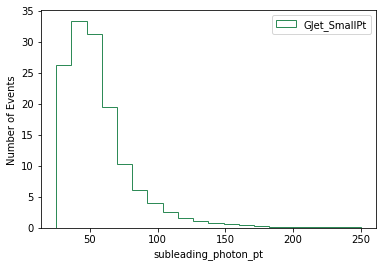

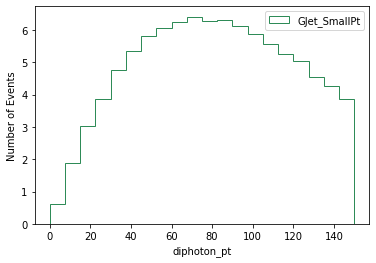

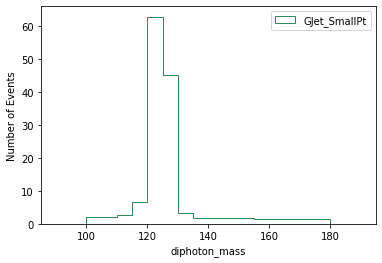

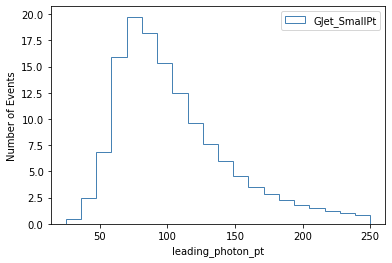

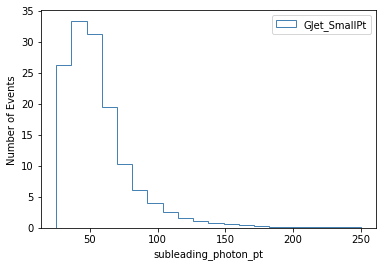

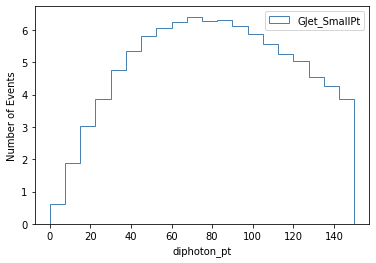

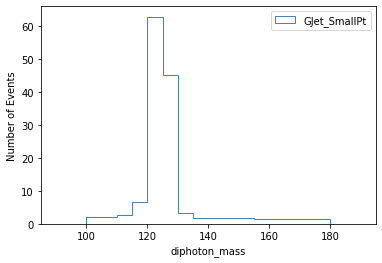

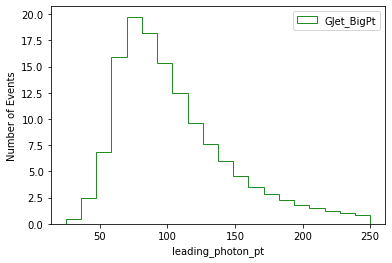

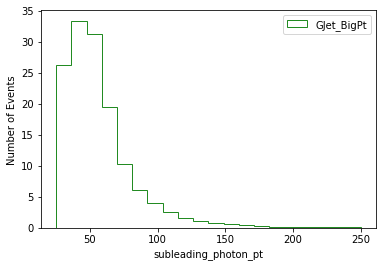

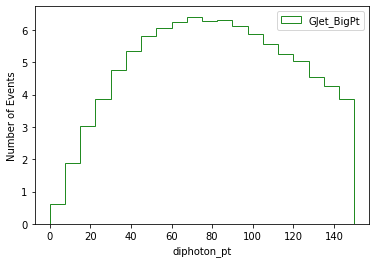

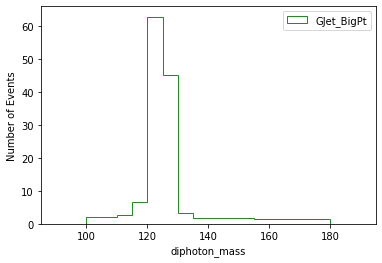

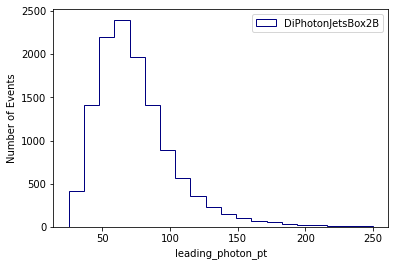

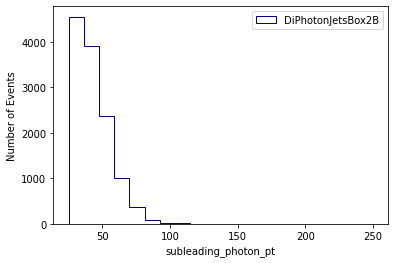

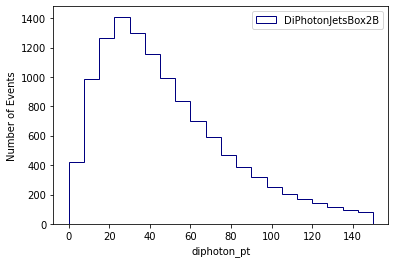

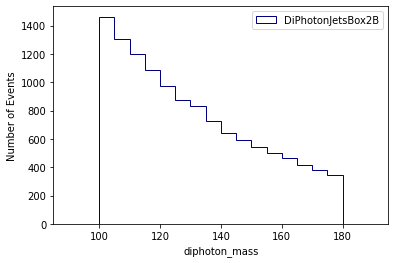

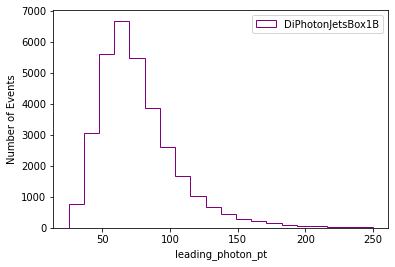

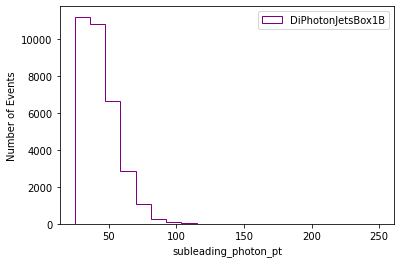

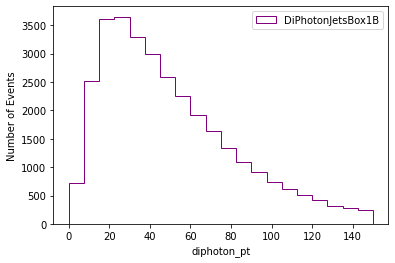

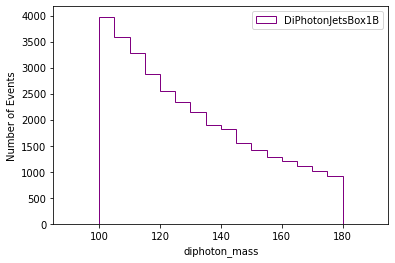

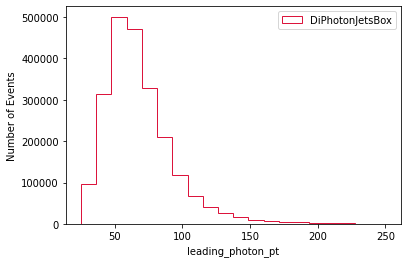

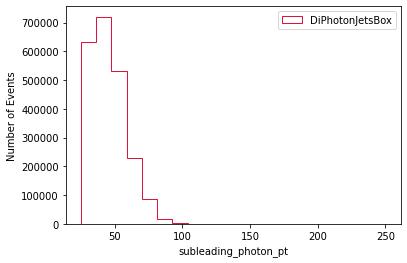

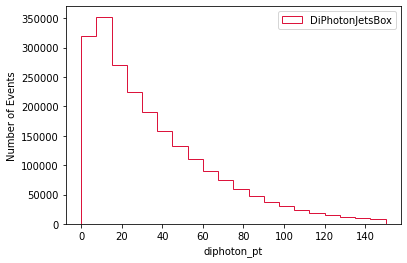

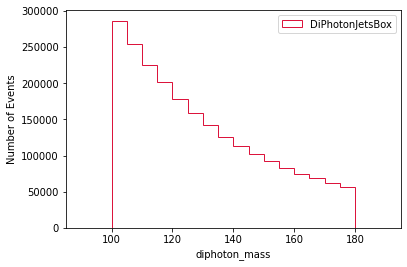

In [29]:
dfs = [GluGluToHH_df, VHToGG_df, ttHToGG_df, GluGluHToGG_df,GJet_SmallPt_df, GJet_SmallPt_df, GJet_BigPt_df,DiPhotonJetsBox2B_df, DiPhotonJetsBox1B_df, DiPhotonJetsBox_df ]
df_names = ['GluGluToHH signal', 'VHToGG', 'ttHToGG', 'GluGluHToGG', 'GJet_SmallPt', 'GJet_SmallPt', 'GJet_BigPt', 'DiPhotonJetsBox2B', 'DiPhotonJetsBox1B', 'DiPhotonJetsBox' ]
colors = ['salmon', 'darkorange', 'goldenrod', 'olive', 'seagreen', 'steelblue', 'forestgreen', 'navy', 'purple', 'crimson']

for i in range(len(dfs)):
    plt.figure()
    plt.hist(dfs[i]['leading_photon_pt'], color=colors[i], weights=dfs[i]['genweight'], bins=20, histtype='step', label=f'{df_names[i]}', range = (25, 250))
    plt.xlabel('leading_photon_pt')
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
    plt.figure()
    plt.hist(dfs[i]['subleading_photon_pt'], color=colors[i], weights=dfs[i]['genweight'], bins=20, histtype='step', label=f'{df_names[i]}', range = (25, 250))
    plt.xlabel('subleading_photon_pt')
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
    plt.figure()
    plt.hist(dfs[i]['diphoton_pt'], color=colors[i], weights=dfs[i]['genweight'], bins=20, histtype='step', label=f'{df_names[i]}', range = (0, 150))
    plt.xlabel('diphoton_pt')
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()
    
    plt.figure()
    plt.hist(dfs[i]['diphoton_mass'], color=colors[i], weights=dfs[i]['genweight'], bins=20, histtype='step', label=f'{df_names[i]}', range = (90, 190))
    plt.xlabel('diphoton_mass')
    plt.ylabel("Number of Events")
    plt.legend(loc='best')
    plt.show()

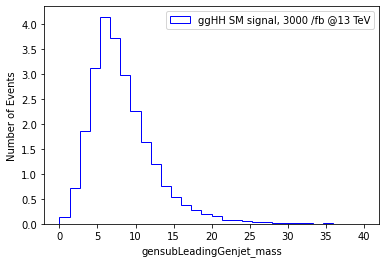

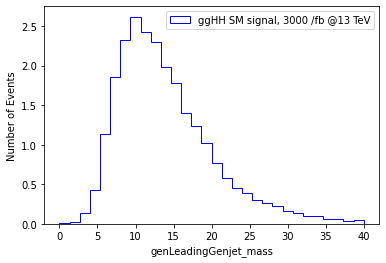

In [6]:
GLFs = ['gensubLeadingGenjet_mass', 'genLeadingGenjet_mass']
bins = np.linspace(10, 300, 50)

for glf in GLFs:
    plt.figure()
    plt.hist(df_signal_ggHH[glf], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=30, range = (0, 40), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
    plt.xlabel(glf)
    plt.ylabel('Number of Events')
    plt.legend(loc='best')

add a title to it

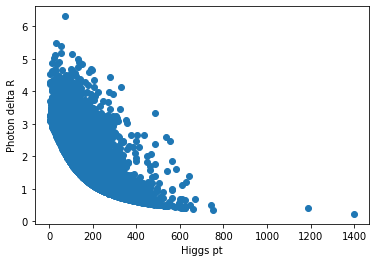

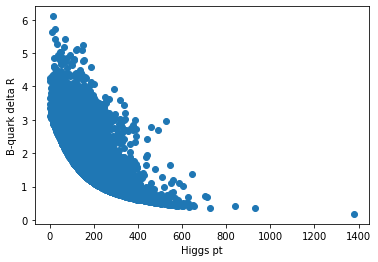

In [7]:
plt.scatter(df_signal_ggHH['genPho_H_pt'], df_signal_ggHH['genPho_deltaR'])
plt.xlabel('Higgs pt')
plt.ylabel('Photon delta R')
plt.savefig(fname = 'Photon delta R vs. Higg pt.png')
plt.show()

plt.scatter(df_signal_ggHH['genBjet_H_pt'], df_signal_ggHH['genBjet_deltaR'])
plt.xlabel('Higgs pt')
plt.ylabel('B-quark delta R')
plt.savefig(fname = 'B-quark delta R vs. Higg pt.png')
plt.show()

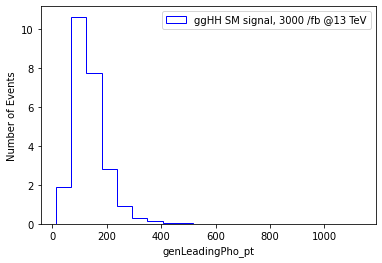

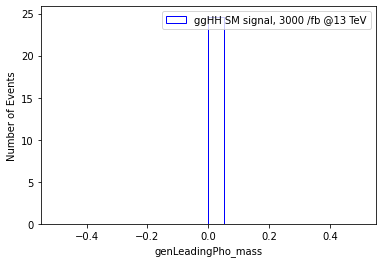

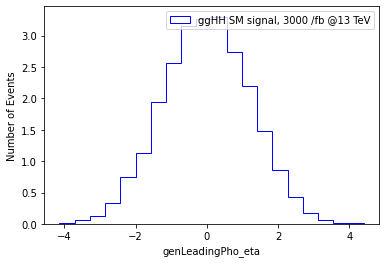

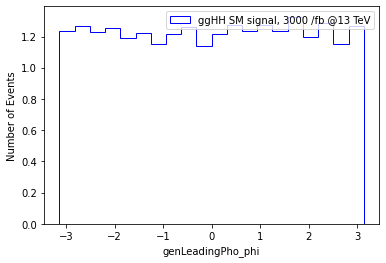

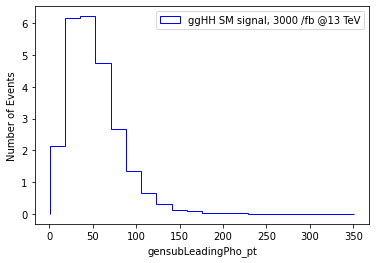

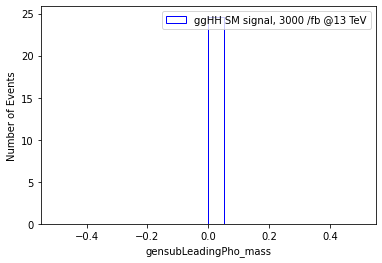

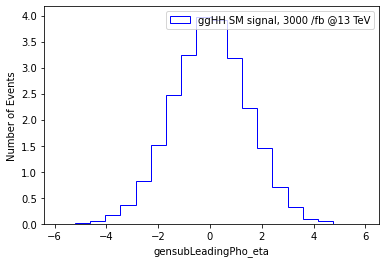

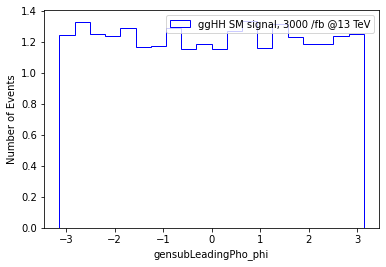

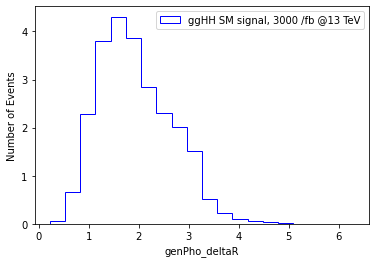

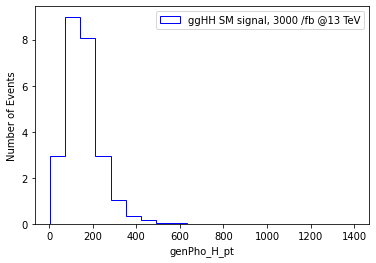

In [8]:
PLFs = ['genLeadingPho_pt', 'genLeadingPho_mass', 'genLeadingPho_eta', 'genLeadingPho_phi', 
                    'gensubLeadingPho_pt', 'gensubLeadingPho_mass', 'gensubLeadingPho_eta', 'gensubLeadingPho_phi',
                   'genPho_deltaR', 'genPho_H_pt']

bins = np.linspace(10, 300, 50)

for plf in PLFs:
    plt.figure()
    plt.hist(df_signal_ggHH[plf], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20, histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
    plt.xlabel(plf)
    plt.ylabel('Number of Events')
    plt.legend(loc='best')
    plt.savefig(fname = plf + '.png')

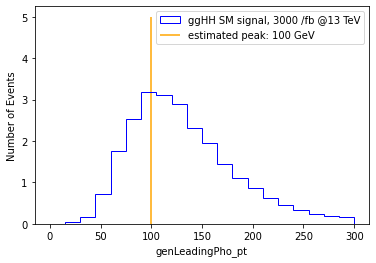

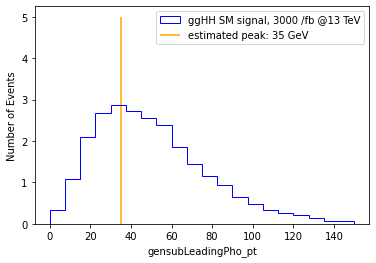

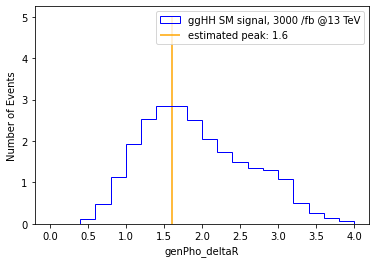

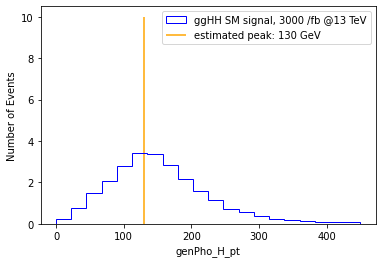

In [13]:
# Close-Ups

plt.figure()
plt.hist(df_signal_ggHH['genLeadingPho_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 300), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genLeadingPho_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 100, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 100 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'genLeadingPho_pt_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['gensubLeadingPho_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 150), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('gensubLeadingPho_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 35, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 35 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'gensubLeadingPho_pt_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['genPho_deltaR'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 4), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genPho_deltaR')
plt.ylabel('Number of Events')
plt.vlines(x= 1.6, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 1.6 ')
plt.legend(loc='best')
plt.savefig(fname = 'genPho_deltaR_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['genPho_H_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 450), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genPho_H_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 130, ymin=0, ymax=10, color = 'orange', label = 'estimated peak: 130 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'genPho_H_pt_close.png')
plt.show()

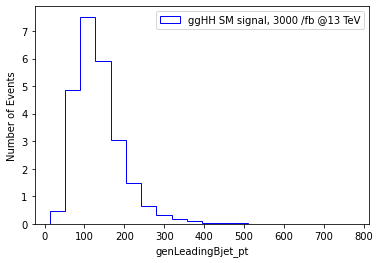

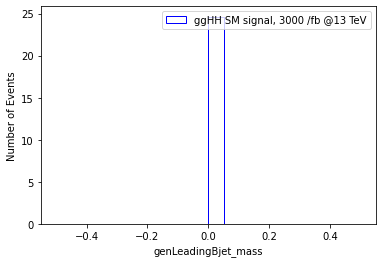

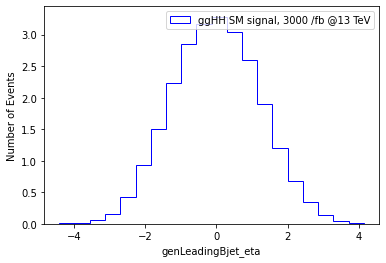

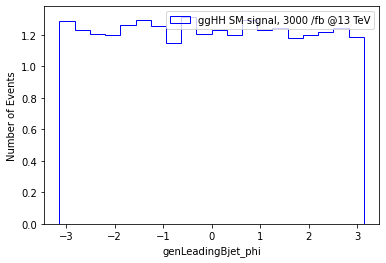

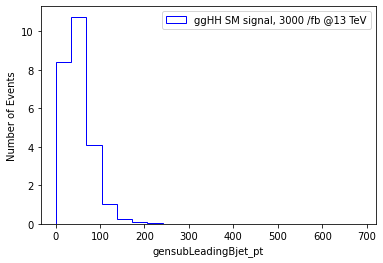

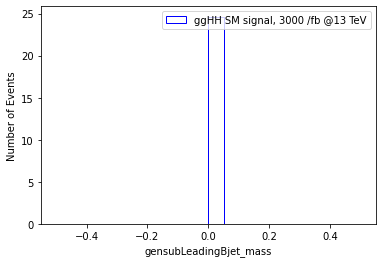

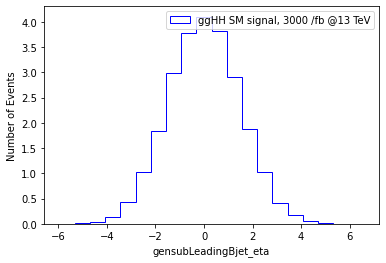

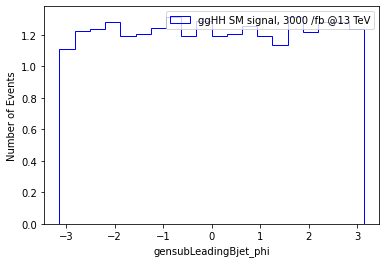

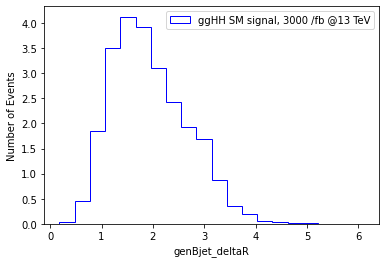

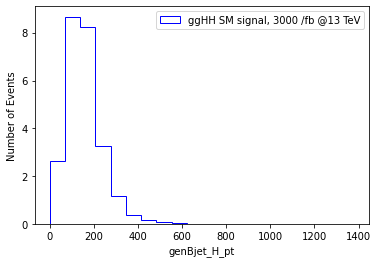

In [4]:
BLFs = ['genLeadingBjet_pt', 'genLeadingBjet_mass', 'genLeadingBjet_eta', 'genLeadingBjet_phi', 
                    'gensubLeadingBjet_pt', 'gensubLeadingBjet_mass', 'gensubLeadingBjet_eta', 
                'gensubLeadingBjet_phi', 'genBjet_deltaR', 'genBjet_H_pt']

bins = np.linspace(10, 300, 50)

for blf in BLFs:
    plt.figure()
    plt.hist(df_signal_ggHH[blf], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20, histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
    plt.xlabel(blf)
    plt.ylabel('Number of Events')
    plt.legend(loc='best')
    plt.savefig(fname = blf + '.png')

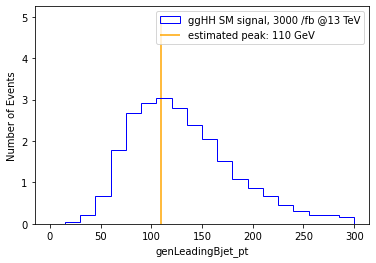

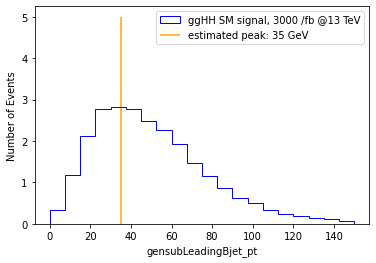

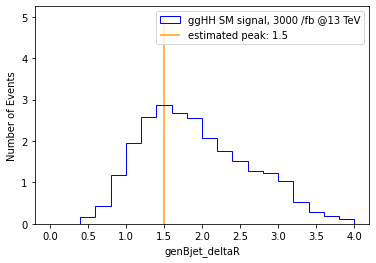

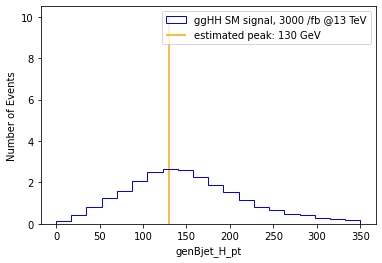

In [9]:
# Close-Ups

plt.figure()
plt.hist(df_signal_ggHH['genLeadingBjet_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 300), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genLeadingBjet_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 110, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 110 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'genLeadingBjet_pt_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['gensubLeadingBjet_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 150), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('gensubLeadingBjet_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 35, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 35 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'gensubLeadingBjet_pt_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['genBjet_deltaR'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 4), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genBjet_deltaR')
plt.ylabel('Number of Events')
plt.vlines(x= 1.5, ymin=0, ymax=5, color = 'orange', label = 'estimated peak: 1.5 ')
plt.legend(loc='best')
plt.savefig(fname = 'genBjet_deltaR_close.png')
plt.show()

plt.figure()
plt.hist(df_signal_ggHH['genBjet_H_pt'], color='blue', weights=df_signal_ggHH['genweight']/sumW, bins=20,range=(0, 350), histtype='step', label='ggHH SM signal, 3000 /fb @13 TeV')
plt.xlabel('genBjet_H_pt')
plt.ylabel('Number of Events')
plt.vlines(x= 130, ymin=0, ymax=10, color = 'orange', label = 'estimated peak: 130 GeV ')
plt.legend(loc='best')
plt.savefig(fname = 'genBjet_H_pt_close.png')
plt.show()

change the color

In [12]:
test_name = 'Incl_March19'

print len(df_bkg.values)
print len(df_bkgM.values)
print len(df_ttbkg.values)
print len(df_signal.values)

signal = df_signal.values
ggH = df_signal_Glu.values
VBFH = df_signal_VBF.values
WH = df_signal_WH.values
ZH = df_signal_ZH.values
bkg_all = df_bkg_all.values
bkgM = df_bkgM.values
ttbkg = df_ttbkg.values

# Shuffle before splitting into train-val
randix = np.arange(len(signal))
np.random.shuffle(randix)
signal = signal[randix]
#signal = signal[:len(bkg)]
#signal = signal[:100000]

randix2 = np.arange(len(bkg_all))
np.random.shuffle(randix2)
bkg_all = bkg_all[randix2]
#bkg = bkg[:100000]

sig_label = np.ones(len(signal))
ggH_label = np.ones(len(ggH))
VBFH_label = np.ones(len(VBFH))

bkg_all_label = np.zeros(len(bkg_all))
bkgM_label = np.zeros(len(bkgM))

print "sum of weights for signal: " 
print np.sum(signal[:,wt_var_indices])
print "sum of weights for DY+tt bkg: " 
print np.sum(bkg_all[:,wt_var_indices])

print "sum of weights for DY105-160GeV bkg: " 
print np.sum(bkgM[:,wt_var_indices])

print "sum of weights for tt bkg: " 
print np.sum(ttbkg[:,wt_var_indices])

221955
24997725
59446
1158423
sum of weights for signal: 
0.221292639733
sum of weights for DY+tt bkg: 
408.679422092
sum of weights for DY105-160GeV bkg: 
411.360780417
sum of weights for tt bkg: 
7.38233497834


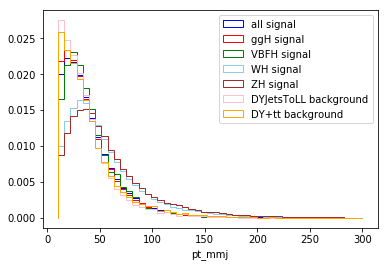

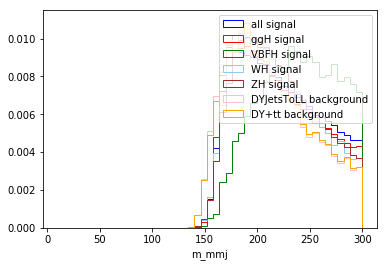

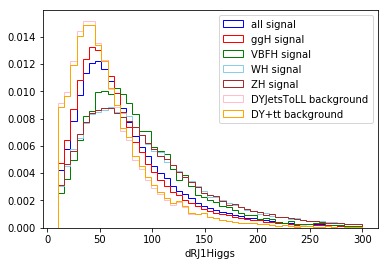

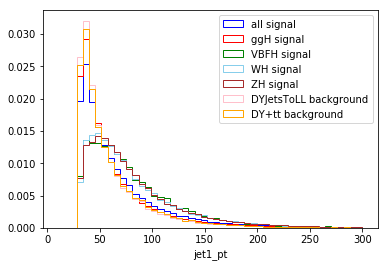

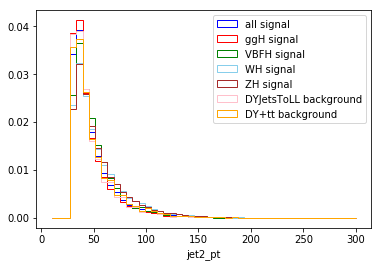

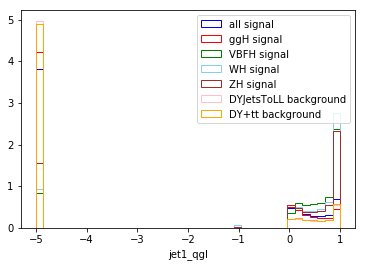

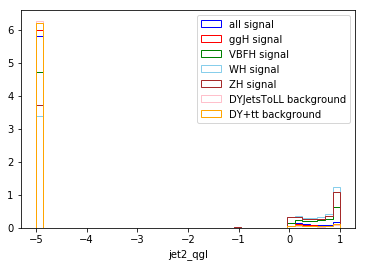

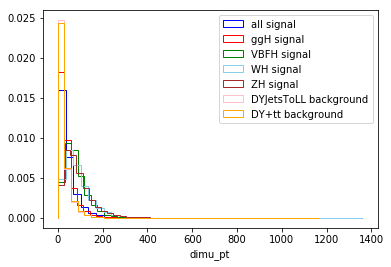

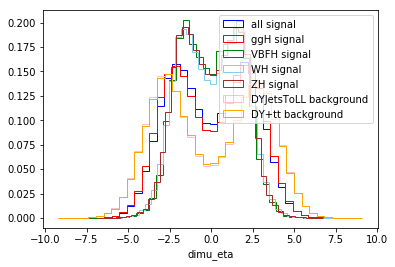

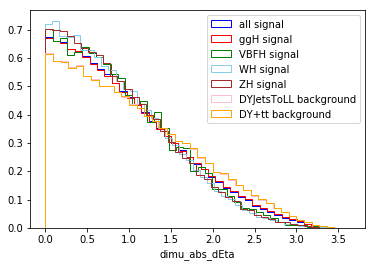

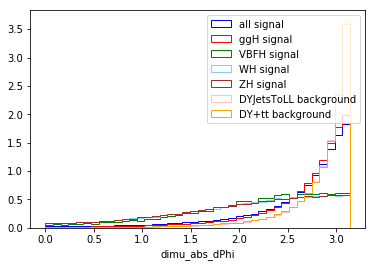

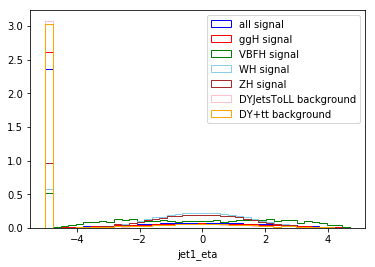

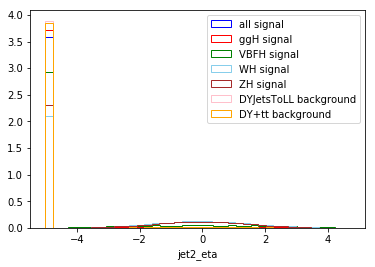

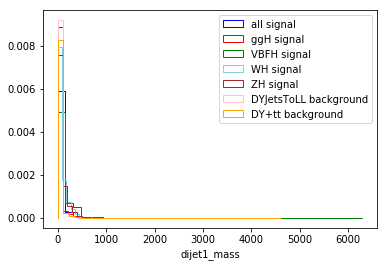

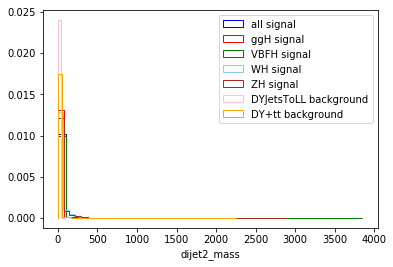

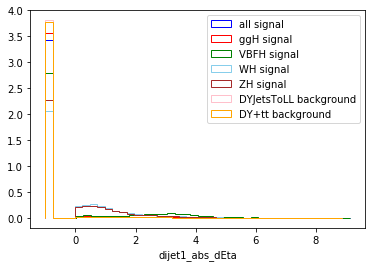

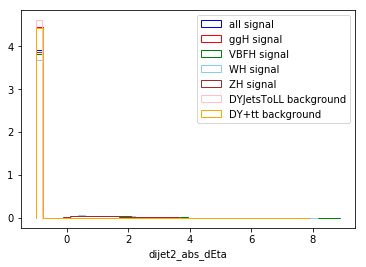

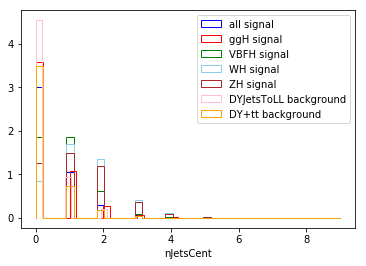

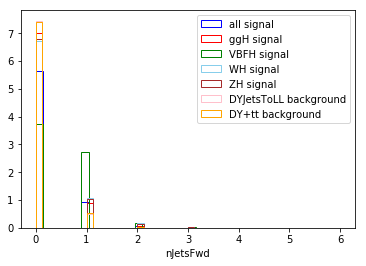

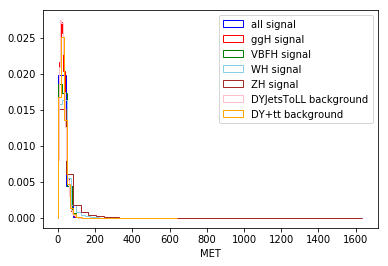

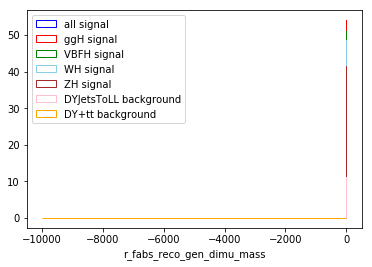

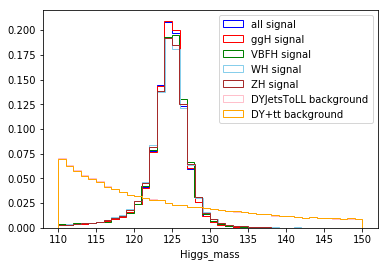

In [22]:
HLFs = ['pt_mmj','m_mmj','dRJ1Higgs','jet1_pt','jet2_pt']

bins = np.linspace(10, 300, 50)

for hlf in HLFs:
    plt.figure()
    plt.hist(df_signal[hlf], weights=df_signal['evt_weight'], color='blue', bins=bins,normed=True, histtype='step', label='all signal')
    plt.hist(df_signal_Glu[hlf], weights=df_signal_Glu['evt_weight'], color='red',bins=bins,normed=True, histtype='step', label='ggH signal')
    plt.hist(df_signal_VBF[hlf], weights=df_signal_VBF['evt_weight'], color='green',bins=bins,normed=True, histtype='step', label='VBFH signal')
    plt.hist(df_signal_WH[hlf], weights=df_signal_WH['evt_weight'], color='skyblue',bins=bins,normed=True, histtype='step', label='WH signal')
    plt.hist(df_signal_ZH[hlf], weights=df_signal_ZH['evt_weight'], color='brown',bins=bins,normed=True, histtype='step', label='ZH signal')
    plt.hist(df_bkg[hlf], weights=df_bkg['evt_weight'], color='pink',bins=bins,normed=True, histtype='step', label='DYJetsToLL background')
    plt.hist(df_bkg_all[hlf], weights=df_bkg_all['evt_weight'], color='Orange',bins=bins,normed=True, histtype='step', label='DY+tt background')
    plt.xlabel(hlf)
    plt.legend(loc='best')

    
HLFs = ['jet1_qgl','jet2_qgl','dimu_pt','dimu_eta','dimu_abs_dEta','dimu_abs_dPhi','jet1_eta','jet2_eta','dijet1_mass','dijet2_mass','dijet1_abs_dEta','dijet2_abs_dEta','nJetsCent','nJetsFwd','MET','r_fabs_reco_gen_dimu_mass','Higgs_mass']

for hlf in HLFs:
    plt.figure()
    plt.hist(df_signal[hlf], weights=df_signal['evt_weight'], color='blue', bins=40,normed=True, histtype='step', label='all signal')
    plt.hist(df_signal_Glu[hlf], weights=df_signal_Glu['evt_weight'], color='red',bins=40,normed=True, histtype='step', label='ggH signal')
    plt.hist(df_signal_VBF[hlf], weights=df_signal_VBF['evt_weight'], color='green',bins=40,normed=True, histtype='step', label='VBFH signal')
    plt.hist(df_signal_WH[hlf], weights=df_signal_WH['evt_weight'], color='skyblue',bins=40,normed=True, histtype='step', label='WH signal')
    plt.hist(df_signal_ZH[hlf], weights=df_signal_ZH['evt_weight'], color='brown',bins=40,normed=True, histtype='step', label='ZH signal')
    plt.hist(df_bkg[hlf], weights=df_bkg['evt_weight'], color='pink',bins=40,normed=True, histtype='step', label='DYJetsToLL background')
    plt.hist(df_bkg_all[hlf], weights=df_bkg_all['evt_weight'], color='Orange',bins=40,normed=True, histtype='step', label='DY+tt background')
    plt.xlabel(hlf)
    plt.legend(loc='best')
    
#bins = np.linspace(0, 0.1, 20)
#plt.hist(df_signal['r_fabs_reco_gen_dimu_mass'],weights=df_signal['evt_weight'],color='blue', bins=bins,density=True,histtype='step')
#plt.hist(df_bkg['r_fabs_reco_gen_dimu_mass'],weights=df_bkg['evt_weight'],color='green', bins=bins,density=True,histtype='step')
#plt.title('resolution ratio')
#plt.show()

In [23]:
bkg_scale = 5.0

#signal[:,wt_var_indices] = np.multiply(signal_wt, sig_scale)
#signal[:,wt_var_indices] = np.multiply(signal[:,wt_var_indices], sig_scale)
#signal[:,tw_var_indices] = signal[:,wt_var_indices] / np.sqrt(signal[:,cal_var_indices])* 383.326
#signal[:,tw_var_indices] = 1.0 / np.sqrt(signal[:,cal_var_indices]) * 0.7
#signal[:,tw_var_indices] = np.multiply(signal[:,cal_var_indices], sig_scale)

#bkg[:,tw_var_indices] = bkg[:,cal_var_indices]/bkg[:,cal_var_indices]

#sig_label = np.ones(len(signal))
#bkg_label = np.zeros(len(bkg))

x = np.concatenate((signal,bkg_all))
y = np.concatenate((sig_label,bkg_all_label))

#randix3 = np.arange(len(x))
#np.random.shuffle(randix3)
#x= x[randix3,...]
#y= y[randix3,...]

#print "after down sampling"
#print len(sig_label)
#print len(bkg_label)

#signal_wt = signal[:,wt_var_indices]

#print "sum of weights for signal: " 
#print np.sum(signal_wt)
#print "sum of weights for bkg: " 
#print np.sum(bkg_wt)

#print "shape"
#print signal[:,wt_var_indices].shape

In [24]:
print(test_name)

Incl_March19


In [25]:
# split data into train and test sets
seed = 7
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

# For training we ignore the columns with the event ID information
x_train_reduced = x_train[:,var_indices]
x_test_reduced = x_test[:,var_indices]

x_test_index = x_test[:,id_var_indices]
x_test_BDT = x_test[:,BDT_var_indices]
x_test_BDT_1 = x_test_BDT.flatten()

x_test_wt = x_test[:,wt_var_indices]
x_test_wt_1 = x_test_wt.flatten()

#x_test_wt_all = np.concatenate((x_test_wt1,x_test_wt2,x_test_wt3,x_test_wt4,x_test_wt5,x_test_wt6,x_test_wt7,x_test_wt8,x_test_wt9,x_test_wt10, x_test_wt11,x_test_wt12,x_test_wt13),axis=1)

x_train_index = x_train[:,id_var_indices]
x_train_BDT = x_train[:,BDT_var_indices]
x_train_BDT_1 = x_train_BDT.flatten()

x_train_wt = x_train[:,wt_var_indices]
x_train_wt_1 = x_train_wt.flatten()

#x_train_wt_all = np.concatenate((x_train_wt1,x_train_wt2,x_train_wt3,x_train_wt4,x_train_wt5,x_train_wt6,x_train_wt7,x_train_wt8,x_train_wt9,x_train_wt10, x_train_wt11,x_train_wt12,x_train_wt13),axis=1)

print "train sample:"
print y_train.shape
print x_train_reduced.shape
print x_train_BDT.shape
print x_train_wt.shape
print x_train_wt_1.shape

print "test sample:"
print y_test.shape
print x_test_reduced.shape
print x_test_BDT.shape
print x_test_wt.shape
print x_test_wt_1.shape

train sample:
(1007876,)
(1007876, 20)
(1007876, 1)
(1007876, 1)
(1007876,)
test sample:
(431948,)
(431948, 20)
(431948, 1)
(431948, 1)
(431948,)


training w/o weight weights
New configuration: {'n_estimators': 457, 'learning_rate': 0.42369021680469859, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.42369021680469859,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=457, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.25%
Accuracy: 82.05%


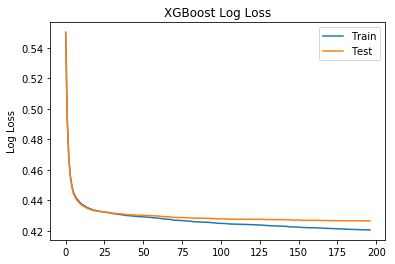

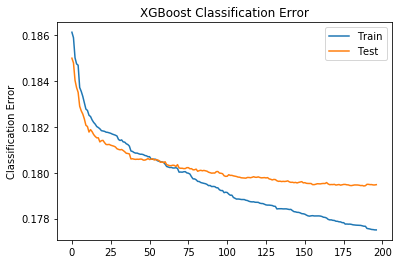

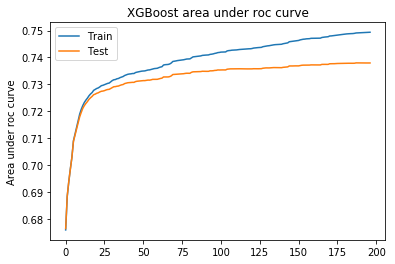

New configuration: {'n_estimators': 315, 'learning_rate': 0.31554621142512651, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.31554621142512651,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=315, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.17%
Accuracy: 82.06%


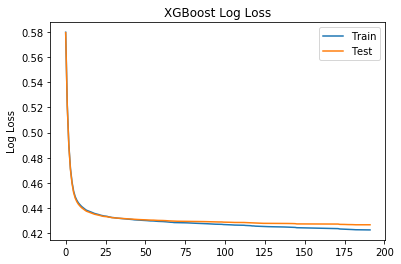

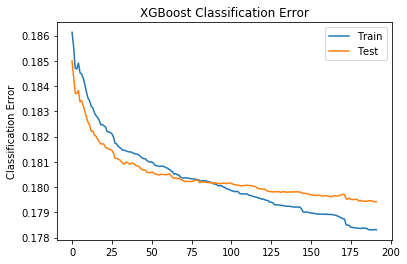

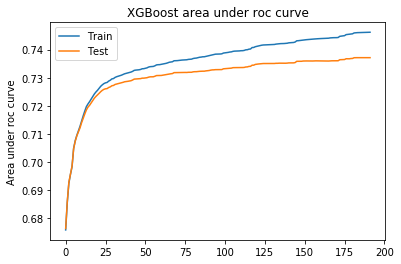

New configuration: {'n_estimators': 282, 'learning_rate': 0.037789358885547165, 'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.037789358885547165,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=282, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 81.72%
Accuracy: 81.80%


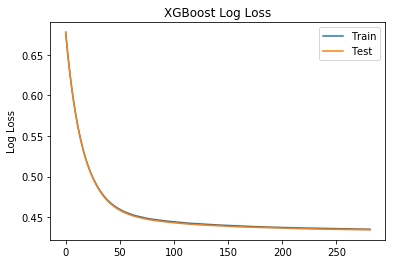

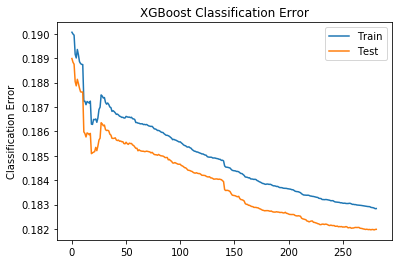

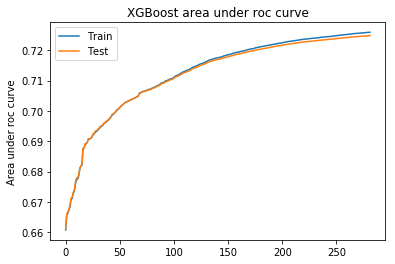

New configuration: {'n_estimators': 344, 'learning_rate': 0.40796267709999179, 'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.40796267709999179,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=344, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.11%
Accuracy: 82.03%


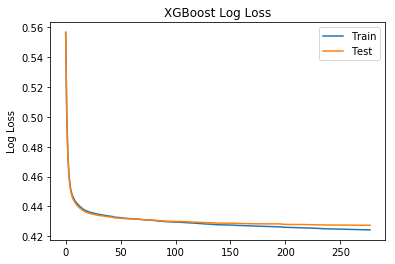

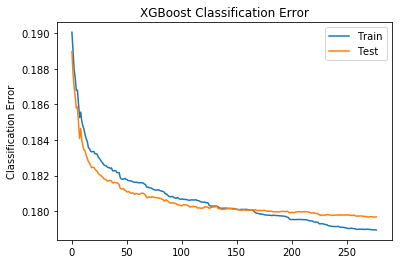

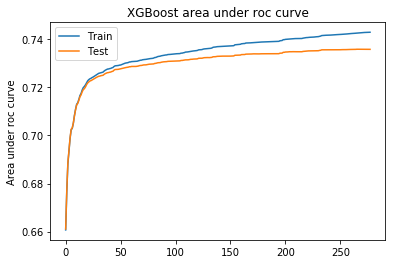

New configuration: {'n_estimators': 301, 'learning_rate': 0.4196785941333151, 'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4196785941333151,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=301, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.04%
Accuracy: 82.02%


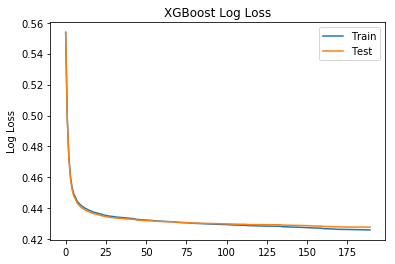

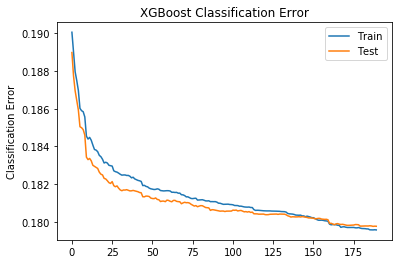

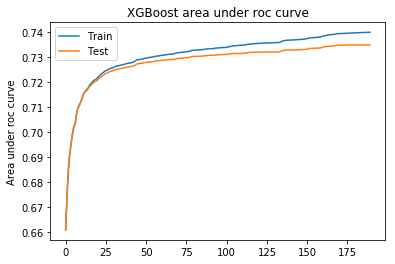

New configuration: {'n_estimators': 487, 'learning_rate': 0.19043835452186855, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.19043835452186855,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=487, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.16%
Accuracy: 82.06%


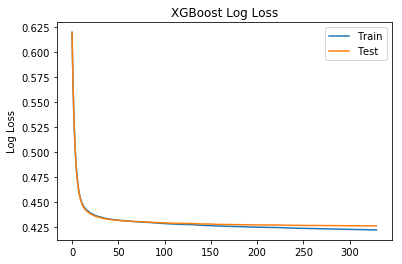

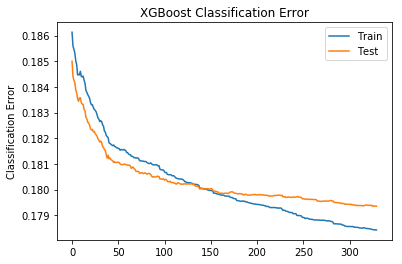

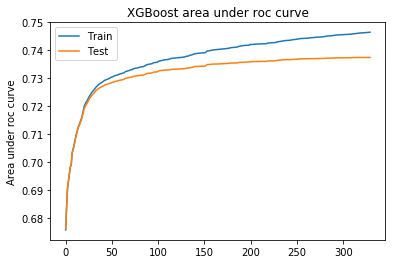

New configuration: {'n_estimators': 342, 'learning_rate': 0.43634275659563393, 'max_depth': 3}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.43634275659563393,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=342, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.18%
Accuracy: 82.05%


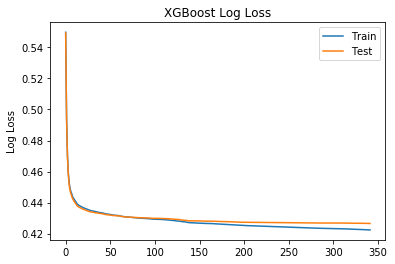

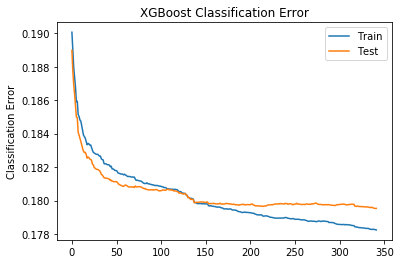

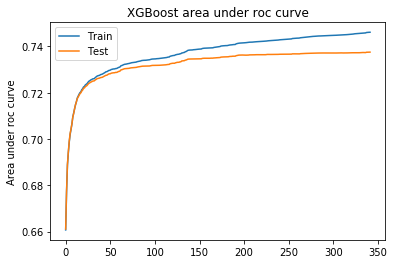

New configuration: {'n_estimators': 404, 'learning_rate': 0.26503396498009041, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.26503396498009041,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=404, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.12%
Accuracy: 82.06%


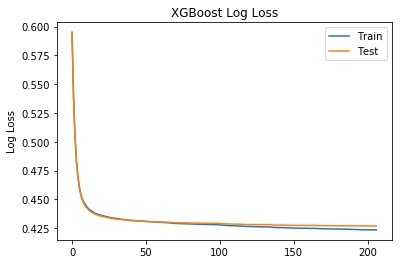

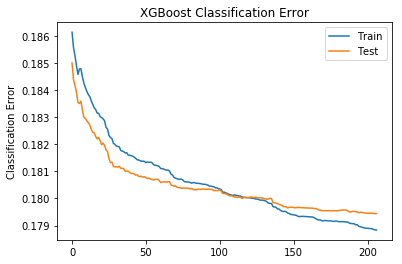

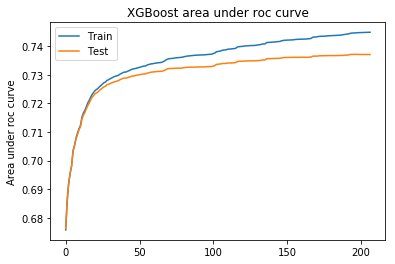

New configuration: {'n_estimators': 361, 'learning_rate': 0.29518969811680257, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.29518969811680257,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=361, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 82.11%
Accuracy: 82.04%


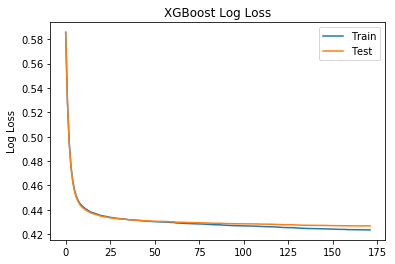

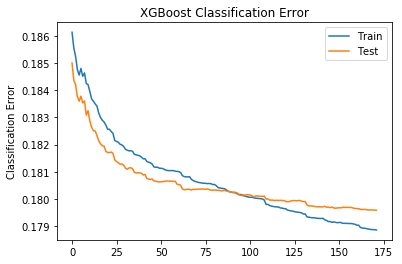

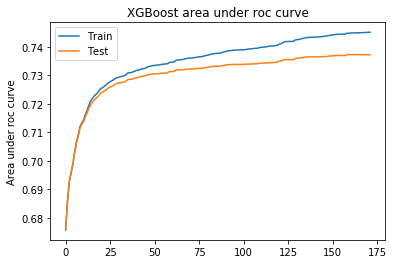

New configuration: {'n_estimators': 342, 'learning_rate': 0.061894727522018161, 'max_depth': 4}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.061894727522018161,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=342, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
Training Accuracy: 81.95%
Accuracy: 81.98%


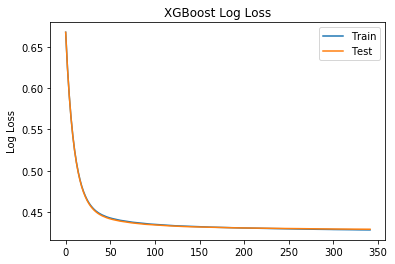

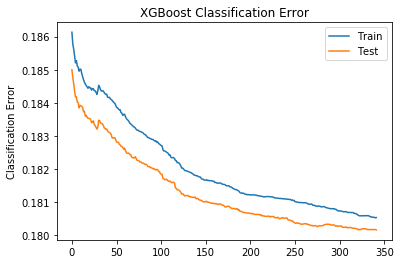

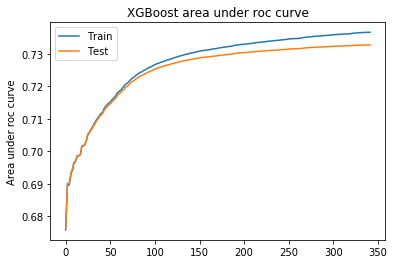

Best parameters: [4, 0.19043835452186855, 487]
Save best configuration to BestConfig_model_Incl_March19_nw.json


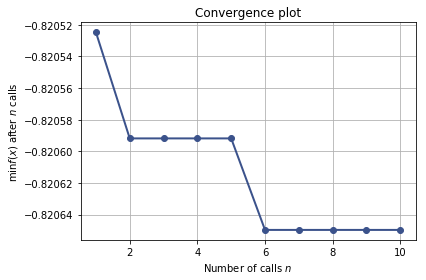

In [26]:
#space2  = [Integer(2, 4, name='max_depth'),
#          Real(0.01, 0.5, name='learning_rate'),
#          Integer(100,400,name='n_estimators'),
#          Real(0.0, 2, name='gamma'),
#          Integer(1,10,name='min_child_weight'),
#          Real(0.5, 1, name='subsample')
#          ]

space2  = [Integer(3, 4, name='max_depth'),
          Real(0.01, 0.5, name='learning_rate'),
          Integer(200,500,name='n_estimators')
          ]

@use_named_args(space2)
def objective2(**X):
    print("New configuration: {}".format(X))
    model_tmp = XGBClassifier(X['max_depth'], X['learning_rate'], X['n_estimators'])
    #model_tmp = XGBClassifier(X['max_depth'], X['learning_rate'], X['n_estimators'], True, 'rank:pairwise', 'gbtree', -1, None, X['gamma'], X['min_child_weight'], 0, X['subsample'], 1, 1,0,1,1,0.5,0,None,None)
    print model_tmp
    eval_set = [(x_train_reduced, y_train), (x_test_reduced, y_test)]
    model_tmp.fit(x_train_reduced, y_train,early_stopping_rounds=10,eval_metric=["logloss","error","auc"],eval_set=eval_set,verbose=False)
        
    y_train_tmp = model_tmp.predict_proba(x_train_reduced)[:, 1]
    predictions_train_tmp = [round(value) for value in y_train_tmp]
    train_accuracy = accuracy_score(y_train, predictions_train_tmp)
    print("Training Accuracy: %.2f%%" % (train_accuracy * 100.0))
    
    y_pred_tmp = model_tmp.predict_proba(x_test_reduced)[:, 1]
    predictions_tmp = [round(value) for value in y_pred_tmp]
    accuracy = accuracy_score(y_test, predictions_tmp)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    # retrieve performance metrics
    results = model_tmp.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

    # plot area under the roc curve
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['auc'], label='Train')
    ax.plot(x_axis, results['validation_1']['auc'], label='Test')
    ax.legend()
    plt.ylabel('Area under roc curve')
    plt.title('XGBoost area under roc curve')
    plt.show()
    
    #diff = train_accuracy-accuracy
    #return diff
    return -accuracy


print "training w/o weight weights"
res_gp2 = gp_minimize(objective2, space2, n_calls=10, random_state=0)

plot_convergence(res_gp2);

print("Best parameters: {}".format(res_gp2.x))
best_max_depth2 = res_gp2.x[0]
best_learning_rate2 = res_gp2.x[1]
best_n_estimators2 = res_gp2.x[2]
#best_gamma2 = res_gp2.x[3]
#best_min_child_weight2 = res_gp2.x[4]
#best_subsample2 = res_gp2.x[5]


model_file2 = 'model_'+test_name+'_nw.pkl'
config_file2 = 'BestConfig_model_'+test_name+'_nw.json'


bestconf2 = {"best_max_depth": best_max_depth2,
          "best_learning_rate": best_learning_rate2,
          "best_n_estimators": best_n_estimators2}
#          "best_gamma": best_gamma2,
#          "best_min_child_weight":best_min_child_weight2,
#          "best_subsample":best_subsample2}

    
with open(config_file2, 'w') as config2:
    json.dump(bestconf2, config2)
    
    print("Save best configuration to {}".format(config_file2))



In [27]:
model2 = XGBClassifier(best_max_depth2,best_learning_rate2,best_n_estimators2)
print model2
output = open(model_file2, 'wb')
# Pickle dictionary using protocol 0.
pickle.dump(model2, output)
output.close()

model2.fit(x_train_reduced, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.19043835452186855,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=487, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.19043835452186855,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=487, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

roc curve for the testing sample
roc curve for the training sample
compare train/test w/o weights in training


<BarContainer object of 20 artists>

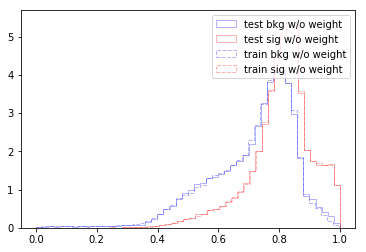

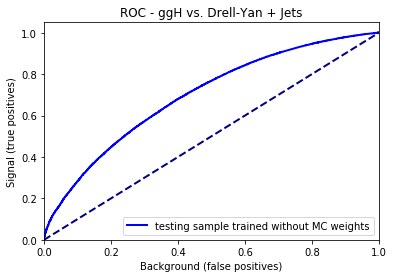

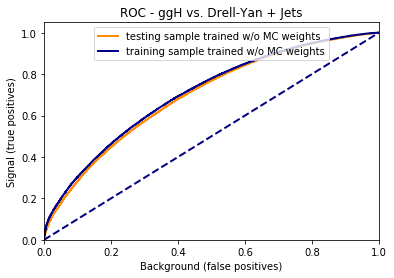

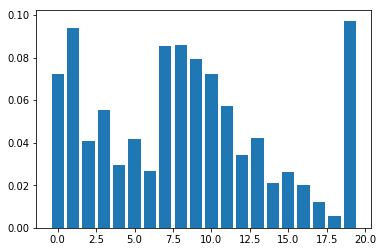

In [28]:
#model2 = XGBClassifier(best_max_depth2,best_learning_rate2,best_n_estimators2,)
#print model2
#model2 = XGBClassifier(best_max_depth2,best_learning_rate2,best_n_estimators2,True, 'rank:pairwise', 'gbtree', -1, None, best_gamma2, best_min_child_weight2, 0, best_subsample2, 1, 1,0,1,1,0.5,0,None,None)
#model2.fit(x_train_reduced, y_train)

# make predictions for test data
y_pred2 = model2.predict_proba(x_test_reduced)[:, 1]
# make predictions for trainig data
y_pred2_train = model2.predict_proba(x_train_reduced)[:, 1]

y_frame2 = pd.DataFrame({'truth':y_test, 'disc':y_pred2, 'evt_weight':x_test_wt_1})
disc_bkg2    = y_frame2[y_frame2['truth'] == 0]['disc'].values
disc_signal2 = y_frame2[y_frame2['truth'] == 1]['disc'].values
bkg_w2    = y_frame2[y_frame2['truth'] == 0]['evt_weight'].values
signal_w2 = y_frame2[y_frame2['truth'] == 1]['evt_weight'].values
#training sample
y_frame_train2 = pd.DataFrame({'truth':y_train, 'disc':y_pred2_train, 'evt_weight':x_train_wt_1})
disc_bkg_train2    = y_frame_train2[y_frame_train2['truth'] == 0]['disc'].values
disc_signal_train2 = y_frame_train2[y_frame_train2['truth'] == 1]['disc'].values
bkg_w_train2    = y_frame_train2[y_frame_train2['truth'] == 0]['evt_weight'].values
signal_w_train2 = y_frame_train2[y_frame_train2['truth'] == 1]['evt_weight'].values
plt.figure()
plt.hist(disc_bkg2, weights=bkg_w2, label='test bkg w/o weight',color='blue',histtype='step',normed=True, bins=50, alpha=0.3)
plt.hist(disc_signal2, weights=signal_w2,label='test sig w/o weight',color='red',histtype='step',normed=True, bins=50, alpha=0.3)
plt.hist(disc_bkg_train2, weights=bkg_w_train2, label='train bkg w/o weight',color='blue',histtype='step',linestyle='dashed', normed=True, bins=50, alpha=0.3)
plt.hist(disc_signal_train2, weights=signal_w_train2,label='train sig w/o weight',color='red',histtype='step',linestyle='dashed',normed=True, bins=50, alpha=0.3)
plt.legend(loc="upper right")
#plt.savefig('myDiscriminator' + test_name + '.png')

#plot with error bars
#x = np.arange(0, 1, 50)
#error_bkg2 = np.sqrt(disc_bkg2)
#error_signal2 = np.sqrt(disc_signal2)
#error_bkg_train2 = np.sqrt(disc_bkg_train2)
#error_signal_train2 = np.sqrt(disc_signal_train2)
#plt.errorbar(x, disc_bkg2, yerr=error_bkg2, fmt='-o')
#plt.set_title('variable, symmetric error')

#get roc curve
print "roc curve for the testing sample"
fpr_nw, tpr_nw, threshold_nw = roc_curve(y_test, y_pred2, None,x_test_wt)
#area = auc(fpr_nw, tpr_nw)
#print "area"
#print area

#fpr_wt_n, tpr_wt_n, _ = roc_curve(y_test, y_pred)
#fpr_nw_n, tpr_nw_n, _ = roc_curve(y_test, y_pred2)


#plot roc curve
plt.figure()
lw = 2
plt.plot(fpr_nw, tpr_nw, color='blue',
         lw=lw, label=r'testing sample trained without MC weights')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Background (false positives)')
plt.ylabel('Signal (true positives)')
plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
plt.legend(loc="lower right")

print "roc curve for the training sample"
fpr_nw_train, tpr_nw_train, _ = roc_curve(y_train, y_pred2_train, None,x_train_wt)

print "compare train/test w/o weights in training"
plt.figure()
lw = 2
plt.plot(fpr_nw, tpr_nw, color='darkorange',
         lw=lw, label=r'testing sample trained w/o MC weights')
plt.plot(fpr_nw_train, tpr_nw_train, color='darkblue',
         lw=lw, label=r'training sample trained w/o MC weights')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Background (false positives)')
plt.ylabel('Signal (true positives)')
plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
plt.legend(loc="upper center")

#print "compare train/test with weights in training"
#plt.figure()
#lw = 2
#plt.plot(fpr_wt, tpr_wt, color='darkblue',
#         lw=lw, label=r'testing with weights in training')
#plt.plot(fpr_wt_train, tpr_wt_train, color='darkred',
#         lw=lw, label=r'training with weights in training')

#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('Background (false positives)')
#plt.ylabel('Signal (true positives)')
#plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
#plt.legend(loc="lower right")
#plt.savefig('myroc_' + test_name + '.png')

# Plot
plt.figure()
plt.bar(range(len(model2.feature_importances_)), model2.feature_importances_)

In [16]:
output = open(model_file2, 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(model2, output)
output.close()

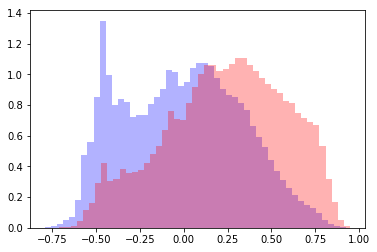

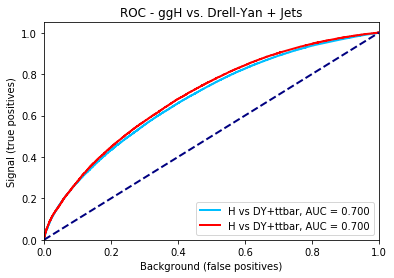

In [29]:
x_wt = x[:,wt_var_indices]
x_wt_1 = x_wt.flatten()

BDT_v = x[:,BDT_var_indices]
BDT_v_1 = BDT_v.flatten()

y_frame = pd.DataFrame({'truth':y, 'BDT':BDT_v_1, 'evt_weight':x_wt_1})

##########################################################
# make histogram of discriminator value for signal and bkg
##########################################################
disc_bkg    = y_frame[y_frame['truth'] == 0]['BDT'].values
disc_signal = y_frame[y_frame['truth'] == 1]['BDT'].values
plt.figure()
plt.hist(disc_bkg, color="blue",normed=True, bins=50, alpha=0.3)
plt.hist(disc_signal, color="red",normed=True, bins=50, alpha=0.3)
#plt.savefig('myDiscriminator' + test_name + '.png')

#get roc curve
fpr, tpr, threshold = roc_curve(y, BDT_v, None,x_wt)
#area = auc(fpr, tpr)
#print area
area = 0.7

#plot roc curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, label="H vs DY+ttbar, AUC = {:.3f}".format(area), color='deepskyblue',
       lw=lw)
plt.plot(fpr_nw, tpr_nw, label="H vs DY+ttbar, AUC = {:.3f}".format(area), color='red',
       lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Background (false positives)')
plt.ylabel('Signal (true positives)')
plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
plt.legend(loc="lower right")

0.8
0.7
0.6
0.5
0.4
0.3
0.2


Text(0.5,0,'$m_{\\mu\\mu}$')

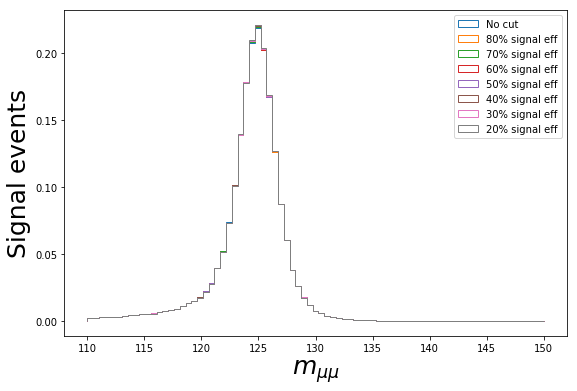

In [32]:
mass_test = x_test[:,mass_var_indices]
mass_test_1 = mass_test.flatten()
y_frame_2 = pd.DataFrame({'truth':y_test, 'mass':mass_test_1,'disc':y_pred2, 'evt_weight':x_test_wt_1})
disc_bkg_2    = y_frame_2[y_frame_2['truth'] == 0]['disc'].values
disc_signal_2 = y_frame_2[y_frame_2['truth'] == 1]['disc'].values
bkg_w_2    = y_frame_2[y_frame_2['truth'] == 0]['evt_weight'].values
signal_w_2 = y_frame_2[y_frame_2['truth'] == 1]['evt_weight'].values
mass_bkg_2 = y_frame_2[y_frame_2['truth'] == 0]['mass'].values
mass_signal_2 = y_frame_2[y_frame_2['truth'] == 1]['mass'].values

fontsize=25
TPR_thresholds = [0.8,0.7,0.6, 0.5, 0.4, 0.3,0.2]
bins = np.linspace(110, 150, 80)
plt.figure(figsize=(9,6))
plt.hist(mass_signal_2, bins=bins, weights=signal_w_2, histtype='step', label='No cut',normed=True)
for TPR_threshold in TPR_thresholds:
    print TPR_threshold
    thres_idx = np.argmax(tpr_nw>TPR_threshold)
    #print "thres_idx"
    #print thres_idx
    #plt.hist(df_bkg['Higgs_mass'][df_bkg['disc_nw']>threshold[thres_idx]], 
    #         bins=100, histtype='step', 
    #         label= "{:.0f}% signal eff".format(100*tpr[thres_idx]),
    #         normed=True)
    
    plt.hist(y_frame_2['mass'][y_frame_2['truth'] == 1][y_frame_2['disc']>threshold[thres_idx]],
              bins=bins,weights=y_frame_2['evt_weight'][y_frame_2['truth'] == 1][y_frame_2['disc']>threshold[thres_idx]], histtype='step', 
             label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
             normed=True)
    
plt.legend(loc='best')
plt.ylabel('Signal events',fontsize=fontsize)
plt.xlabel(r'$m_{\mu\mu}$',fontsize=fontsize)

0.8
0.7
0.6
0.5
0.4
0.3
0.2


Text(0.5,0,'$m_{\\mu\\mu}$')

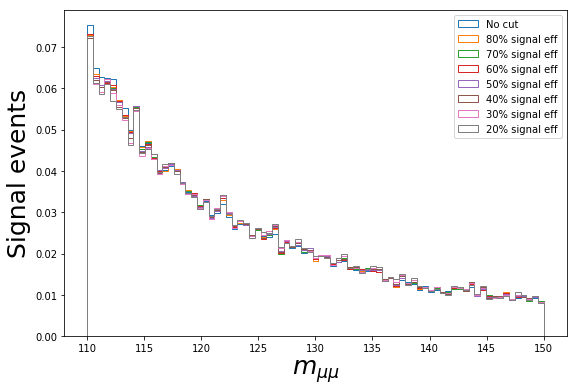

In [33]:
plt.figure(figsize=(9,6))
plt.hist(mass_bkg_2, bins=bins, weights=bkg_w_2, histtype='step', label='No cut',normed=True)
for TPR_threshold in TPR_thresholds:
    print TPR_threshold
    thres_idx = np.argmax(tpr_nw>TPR_threshold)
    #print "thres_idx"
    #print thres_idx
    #plt.hist(df_bkg['Higgs_mass'][df_bkg['disc_nw']>threshold[thres_idx]], 
    #         bins=100, histtype='step', 
    #         label= "{:.0f}% signal eff".format(100*tpr[thres_idx]),
    #         normed=True)
    
    plt.hist(y_frame_2['mass'][y_frame_2['truth'] == 0][y_frame_2['disc']>threshold[thres_idx]],
              bins=bins,weights=y_frame_2['evt_weight'][y_frame_2['truth'] == 0][y_frame_2['disc']>threshold[thres_idx]], histtype='step', 
             label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
             normed=True)
    
plt.legend(loc='best')
plt.ylabel('Signal events',fontsize=fontsize)
plt.xlabel(r'$m_{\mu\mu}$',fontsize=fontsize)

0.95
0.05


Text(0.5,0,'$m_{\\mu\\mu}$')

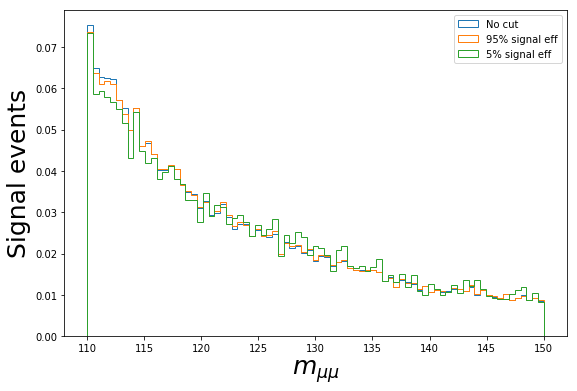

In [34]:
TPR_thresholds = [0.95,0.05]
plt.figure(figsize=(9,6))
plt.hist(mass_bkg_2, bins=bins, weights=bkg_w_2, histtype='step', label='No cut',normed=True)
for TPR_threshold in TPR_thresholds:
    print TPR_threshold
    thres_idx = np.argmax(tpr_nw>TPR_threshold)
    #print "thres_idx"
    #print thres_idx
    #plt.hist(df_bkg['Higgs_mass'][df_bkg['disc_nw']>threshold[thres_idx]], 
    #         bins=100, histtype='step', 
    #         label= "{:.0f}% signal eff".format(100*tpr[thres_idx]),
    #         normed=True)
    
    plt.hist(y_frame_2['mass'][y_frame_2['truth'] == 0][y_frame_2['disc']>threshold[thres_idx]],
              bins=bins,weights=y_frame_2['evt_weight'][y_frame_2['truth'] == 0][y_frame_2['disc']>threshold[thres_idx]], histtype='step', 
             label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
             normed=True)
    
plt.legend(loc='best')
plt.ylabel('Signal events',fontsize=fontsize)
plt.xlabel(r'$m_{\mu\mu}$',fontsize=fontsize)

In [21]:
y_frame_2.to_pickle("y_frame_2_morevars.pkl")

In [37]:
np.save("y_test_morevars", y_test)
np.save("y_pred2_morevars", y_pred2)
np.save("x_test_wt_morevars", x_test)
np.save("x_test_wt_morevars", x_test_wt)

np.save("y_train_morevars", y_train)
np.save("y_pred2_train_morevars", y_pred2_train)
np.save("x_test_wt_morevars", x_train)
np.save("x_test_wt_morevars", x_train_wt)

In [23]:
df = pd.read_pickle("y_frame_2_morevars.pkl")

In [39]:
print(df)

            disc  evt_weight        mass  truth
0       0.909854    0.000035  124.902180    1.0
1       0.986777    0.000340  123.937821    1.0
2       0.744950    0.000346  126.727356    1.0
3       0.663181    2.763985  113.505399    0.0
4       0.970416    0.000029  126.813429    1.0
5       0.868947    0.000344  118.516901    1.0
6       0.969462    0.000030  124.757124    1.0
7       0.849914    0.000029  127.294722    1.0
8       0.909346    0.000029  124.800071    1.0
9       0.256256    0.000030  125.318134    1.0
10      0.893923    0.000030  124.119634    1.0
11      0.619108    0.000346  125.958473    1.0
12      0.740145    2.763985  118.471022    0.0
13      0.725135    0.000342  127.922962    1.0
14      0.849562    0.000030  119.754779    1.0
15      0.852260    0.000344  123.721366    1.0
16      0.781647    0.000346  121.443960    1.0
17      0.889285    0.000342  128.096540    1.0
18      0.504078    0.000030  124.926807    1.0
19      0.947608    0.000029  123.119239

In [39]:
#signal = df_signal.values
#ggH = df_signal_Glu.values
#VBFH = df_signal_VBF.values
WH = df_signal_WH.values
ZH = df_signal_ZH.values
WH_label = np.ones(len(WH))
ZH_label = np.ones(len(ZH))

# make predictions for signal proccess
#infile = open("model_Incl_March19_nw.pkl","rb")
#model_opt = pickle.load(infile)
#print(model_opt)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.19043835452186855,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
       n_estimators=487, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)


In [49]:
x_VBFH = np.concatenate((ggH,bkgM))
y_VBFH = np.concatenate((ggH_label,bkgM_label))

#x_ggH = np.concatenate((ggH,bkg_all))
#y_ggH = np.concatenate((ggH_label,bkg_all_label))
#x_WH = np.concatenate((WH,bkg_all))
#y_WH = np.concatenate((WH_label,bkg_all_label))
#x_ZH = np.concatenate((ZH,bkg_all))
#y_ZH = np.concatenate((ZH_label,bkg_all_label))

y_pred_VBFH = model2.predict_proba(x_VBFH[:,var_indices])[:, 1]

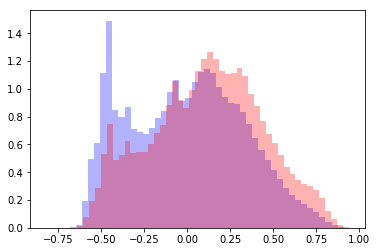

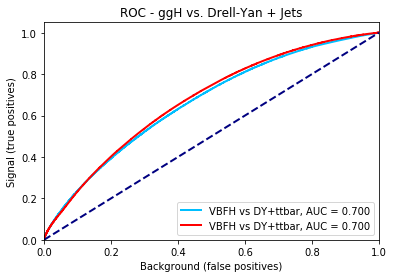

In [50]:
x_VBFH_wt = x_VBFH[:,wt_var_indices]
x_VBFH_wt_1 = x_VBFH_wt.flatten()

BDT_VBFH_v = x_VBFH[:,BDT_var_indices]
BDT_VBFH_v_1 = BDT_VBFH_v.flatten()

y_VBFH_frame = pd.DataFrame({'truth':y_VBFH, 'BDT':BDT_VBFH_v_1, 'evt_weight':x_VBFH_wt_1})

##########################################################
# make histogram of discriminator value for signal and bkg
##########################################################
disc_VBFH_bkg    = y_VBFH_frame[y_VBFH_frame['truth'] == 0]['BDT'].values
disc_VBFH_signal = y_VBFH_frame[y_VBFH_frame['truth'] == 1]['BDT'].values
plt.figure()
plt.hist(disc_VBFH_bkg, color="blue",normed=True, bins=50, alpha=0.3)
plt.hist(disc_VBFH_signal, color="red",normed=True, bins=50, alpha=0.3)
#plt.savefig('myDiscriminator' + test_name + '.png')

#get roc curve
fpr_VBFH, tpr_VBFH, threshold_VBFH = roc_curve(y_VBFH, BDT_VBFH_v, None,x_VBFH_wt)
fpr_nw_VBFH, tpr_nw_VBFH, threshold_nw_VBFH = roc_curve(y_VBFH, y_pred_VBFH, None,x_VBFH_wt)


#area = auc(fpr, tpr)
#print area
area = 0.7

#plot roc curve
plt.figure()
lw = 2
plt.plot(fpr_VBFH, tpr_VBFH, label="VBFH vs DY+ttbar, AUC = {:.3f}".format(area), color='deepskyblue',
       lw=lw)
plt.plot(fpr_nw_VBFH, tpr_nw_VBFH, label="VBFH vs DY+ttbar, AUC = {:.3f}".format(area), color='red',
       lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Background (false positives)')
plt.ylabel('Signal (true positives)')
plt.title(r'ROC - ggH vs. Drell-Yan + Jets')
plt.legend(loc="lower right")

0.95
0.05


Text(0.5,0,'$m_{\\mu\\mu}$')

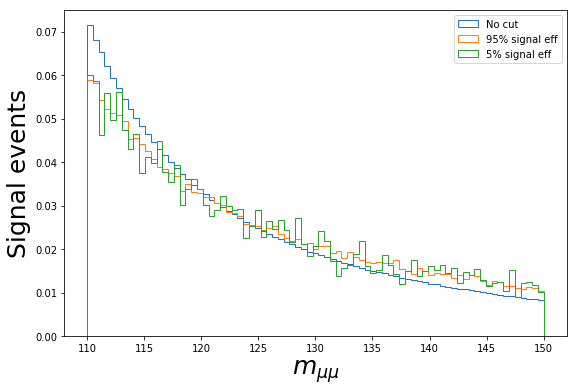

In [51]:
mass_VBFH= x_VBFH[:,mass_var_indices]
mass_VBFH_1 = mass_VBFH.flatten()
y_VBFH_frame_2 = pd.DataFrame({'truth':y_VBFH, 'mass':mass_VBFH_1,'disc':y_pred_VBFH, 'evt_weight':x_VBFH_wt_1})
bkg_VBFH_w_2    = y_VBFH_frame_2[y_VBFH_frame_2['truth'] == 0]['evt_weight'].values
signal_VBFH_w_2 = y_VBFH_frame_2[y_VBFH_frame_2['truth'] == 1]['evt_weight'].values
mass_VBFH_bkg_2 = y_VBFH_frame_2[y_VBFH_frame_2['truth'] == 0]['mass'].values
mass_VBFH_signal_2 = y_VBFH_frame_2[y_VBFH_frame_2['truth'] == 1]['mass'].values

0.9
0.7
0.5
0.3
0.1
0.05


Text(0.5,0,'$m_{\\mu\\mu}$')

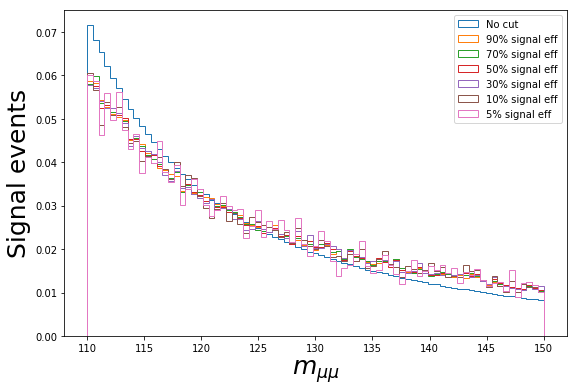

In [63]:
TPR_thresholds = [0.9,0.7,0.5,0.3,0.1,0.05]
plt.figure(figsize=(9,6))
plt.hist(y_VBFH_frame_2['mass'][y_VBFH_frame_2['truth'] == 0], bins=bins, weights=y_VBFH_frame_2['evt_weight'][y_VBFH_frame_2['truth'] == 0], histtype='step', label='No cut',normed=True)
for TPR_threshold in TPR_thresholds:
    print TPR_threshold
    thres_idx = np.argmax(tpr_nw>TPR_threshold)
    
    #plt.hist(y_VBFH_frame_2['mass'][y_VBFH_frame_2['truth'] == 0][y_VBFH_frame_2['disc']>0.5],
    #          bins=bins,weights=y_VBFH_frame_2['evt_weight'][y_VBFH_frame_2['truth'] == 0][y_VBFH_frame_2['disc']>0.5], histtype='step', 
    #         label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
    #         normed=True)
    
    plt.hist(y_VBFH_frame_2['mass'][y_VBFH_frame_2['truth'] == 0][y_VBFH_frame_2['disc']>threshold_nw_VBFH[thres_idx]],
              bins=bins,weights=y_VBFH_frame_2['evt_weight'][y_VBFH_frame_2['truth'] == 0][y_VBFH_frame_2['disc']>threshold_nw_VBFH[thres_idx]], histtype='step', 
             label= "{:.0f}% signal eff".format(100*tpr_nw[thres_idx]),
             normed=True)
    
plt.legend(loc='best')
plt.ylabel('Signal events',fontsize=fontsize)
plt.xlabel(r'$m_{\mu\mu}$',fontsize=fontsize)